In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sklearn.preprocessing as preprocessing 

sns.set()
%matplotlib inline

# Reading Dataset

In [2]:
data=pd.read_csv("datahealth.csv")

In [3]:
df=data.copy()
df.head()

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks
0,P1,Persistent,Male,Caucasian,Not Hispanic,West,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
1,P2,Non-Persistent,Male,Asian,Not Hispanic,West,55-65,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,0
2,P3,Non-Persistent,Female,Other/Unknown,Hispanic,Midwest,65-75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,Y,N,N,N,N,N,N,N,2
3,P4,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1
4,P5,Non-Persistent,Female,Caucasian,Not Hispanic,Midwest,>75,GENERAL PRACTITIONER,Others,OB/GYN/Others/PCP/Unknown,...,N,N,N,N,N,N,N,N,N,1


# Basic Analysis

In [4]:
df.shape

(3424, 69)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 69 columns):
 #   Column                                                              Non-Null Count  Dtype 
---  ------                                                              --------------  ----- 
 0   Ptid                                                                3424 non-null   object
 1   Persistency_Flag                                                    3424 non-null   object
 2   Gender                                                              3424 non-null   object
 3   Race                                                                3424 non-null   object
 4   Ethnicity                                                           3424 non-null   object
 5   Region                                                              3424 non-null   object
 6   Age_Bucket                                                          3424 non-null   object
 7   Ntm_Speciality          

# Data Cleansing and Transformation:

Missing Values:

In [6]:
in_df=df.columns[df.dtypes!='object']
obj_df=df.columns[df.dtypes=='object']

In [7]:
print(in_df)

Index(['Dexa_Freq_During_Rx', 'Count_Of_Risks'], dtype='object')


In [8]:
print(obj_df)

Index(['Ptid', 'Persistency_Flag', 'Gender', 'Race', 'Ethnicity', 'Region',
       'Age_Bucket', 'Ntm_Speciality', 'Ntm_Specialist_Flag',
       'Ntm_Speciality_Bucket', 'Gluco_Record_Prior_Ntm',
       'Gluco_Record_During_Rx', 'Dexa_During_Rx', 'Frag_Frac_Prior_Ntm',
       'Frag_Frac_During_Rx', 'Risk_Segment_Prior_Ntm',
       'Tscore_Bucket_Prior_Ntm', 'Risk_Segment_During_Rx',
       'Tscore_Bucket_During_Rx', 'Change_T_Score', 'Change_Risk_Segment',
       'Adherent_Flag', 'Idn_Indicator', 'Injectable_Experience_During_Rx',
       'Comorb_Encounter_For_Screening_For_Malignant_Neoplasms',
       'Comorb_Encounter_For_Immunization',
       'Comorb_Encntr_For_General_Exam_W_O_Complaint,_Susp_Or_Reprtd_Dx',
       'Comorb_Vitamin_D_Deficiency',
       'Comorb_Other_Joint_Disorder_Not_Elsewhere_Classified',
       'Comorb_Encntr_For_Oth_Sp_Exam_W_O_Complaint_Suspected_Or_Reprtd_Dx',
       'Comorb_Long_Term_Current_Drug_Therapy', 'Comorb_Dorsalgia',
       'Comorb_Personal_History_Of

In [9]:
df[in_df].isnull().sum()

Dexa_Freq_During_Rx    0
Count_Of_Risks         0
dtype: int64

In [10]:
df[obj_df].isnull().sum()

Ptid                              0
Persistency_Flag                  0
Gender                            0
Race                              0
Ethnicity                         0
                                 ..
Risk_Excessive_Thinness           0
Risk_Hysterectomy_Oophorectomy    0
Risk_Estrogen_Deficiency          0
Risk_Immobilization               0
Risk_Recurring_Falls              0
Length: 67, dtype: int64

Duplicate values:

In [11]:
duplicate=df[df.duplicated()]
duplicate

,Ptid,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,...,Risk_Family_History_Of_Osteoporosis,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks


Outliers Detection and Removal:

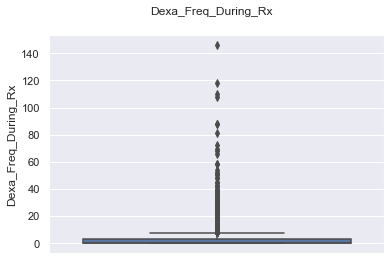

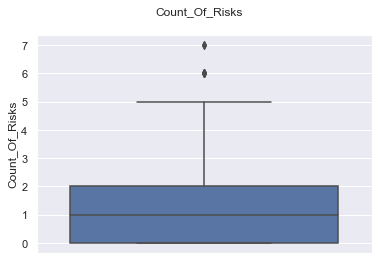

In [12]:
for x in df.columns[df.dtypes!=object]:
    fig=plt.figure()
    sns.boxplot(y=df[x],data=df)
    fig.suptitle(x)

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
percentile25 = df['Dexa_Freq_During_Rx'].quantile(0.25)
percentile75 = df['Dexa_Freq_During_Rx'].quantile(0.75)
upper_limit = percentile75 + 1.5 * (percentile75 -percentile25 )
lower_limit = percentile25 - 1.5 * (percentile75 -percentile25 )
df[df['Dexa_Freq_During_Rx'] > upper_limit]
df[df['Dexa_Freq_During_Rx'] < lower_limit]
df3 = df[df['Dexa_Freq_During_Rx'] < upper_limit]
df3.shape

(2964, 69)

In [15]:
df3_cap = df.copy()
df3_cap['Dexa_Freq_During_Rx'] = np.where(
    df3_cap['Dexa_Freq_During_Rx'] > upper_limit,
    upper_limit,
    np.where(
        df3_cap['Dexa_Freq_During_Rx'] < lower_limit,
        lower_limit,
        df3_cap['Dexa_Freq_During_Rx']
    )
)

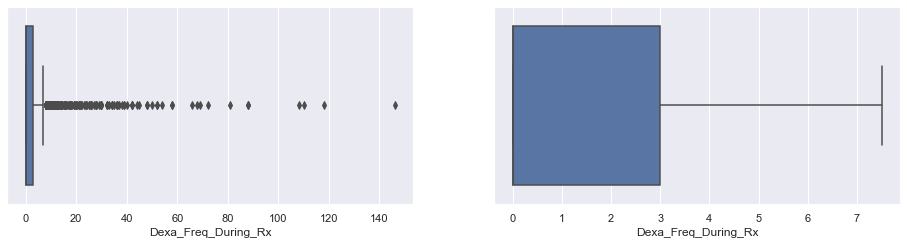

In [16]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.boxplot(df['Dexa_Freq_During_Rx'])
plt.subplot(2,2,2)
sns.boxplot(df3_cap['Dexa_Freq_During_Rx'])
plt.show()

In [17]:
percentile25 = df3_cap['Count_Of_Risks'].quantile(0.25)
percentile75 = df3_cap['Count_Of_Risks'].quantile(0.75)
upper_limit = percentile75 + 1.5 * (percentile75 -percentile25 )
lower_limit = percentile25 - 1.5 * (percentile75 -percentile25 )
df3_cap[df3_cap['Count_Of_Risks'] > upper_limit]
df3_cap[df3_cap['Count_Of_Risks'] < lower_limit]
new_df = df3_cap[df3_cap['Count_Of_Risks'] < upper_limit]
new_df.shape

(3401, 69)

In [18]:
new_df_cap = df3_cap.copy()
new_df_cap['Count_Of_Risks'] = np.where(
    new_df_cap['Count_Of_Risks'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['Count_Of_Risks'] < lower_limit,
        lower_limit,
        new_df_cap['Count_Of_Risks']
    )
)

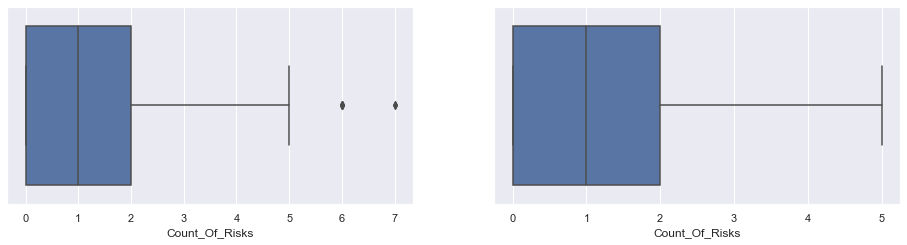

In [19]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.boxplot(df3_cap['Count_Of_Risks'])
plt.subplot(2,2,2)
sns.boxplot(new_df_cap['Count_Of_Risks'])
plt.show()

In [20]:
df=new_df_cap.copy()

Grouping Sparse Classes:

In [21]:
df1=df.drop(['Ptid'],axis=1)

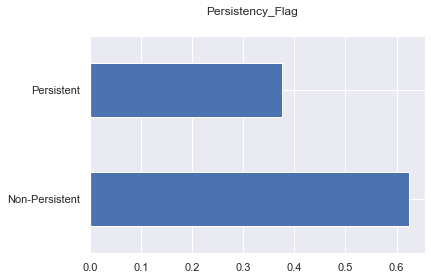

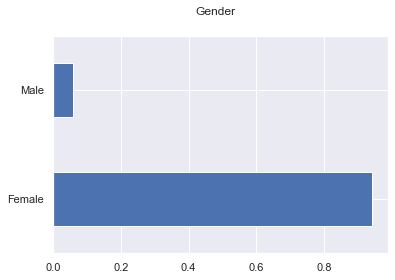

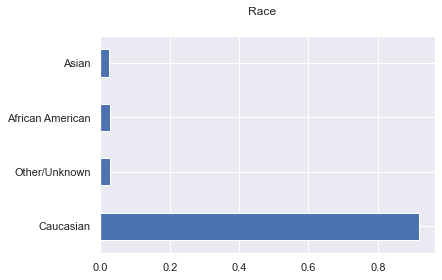

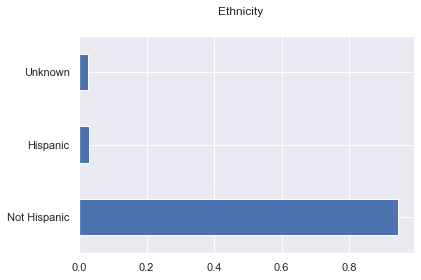

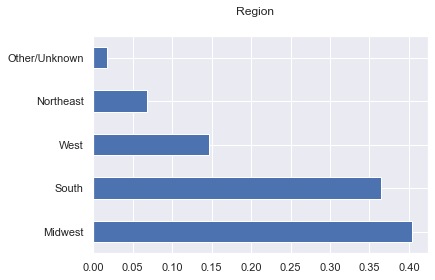

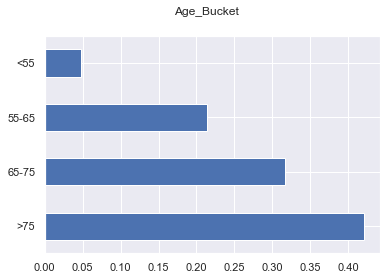

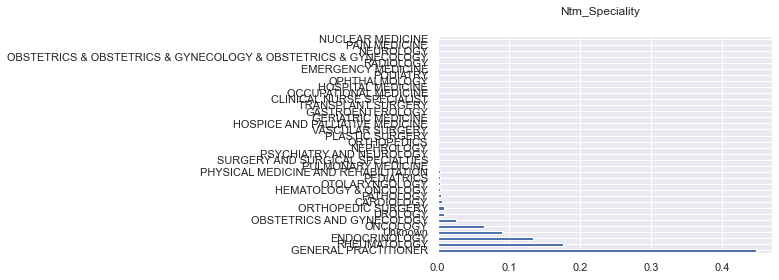

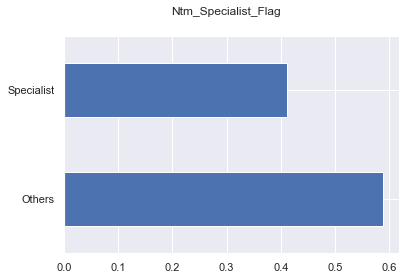

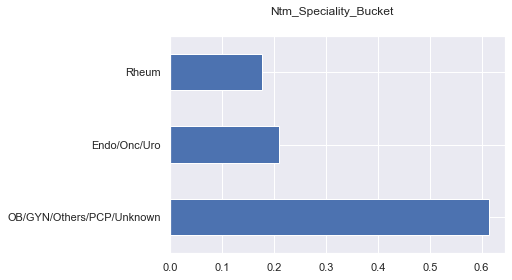

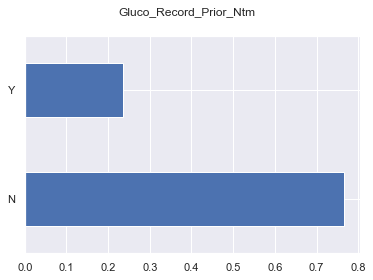

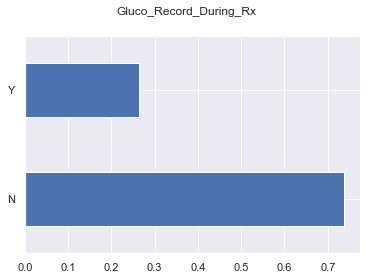

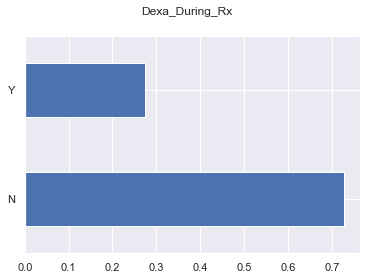

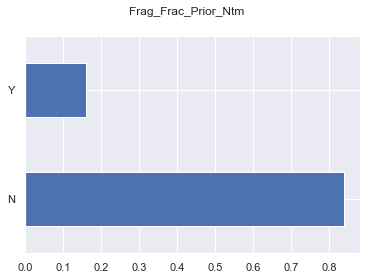

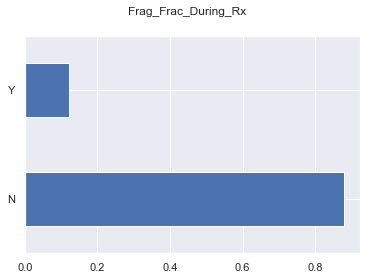

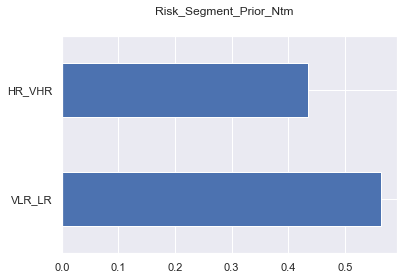

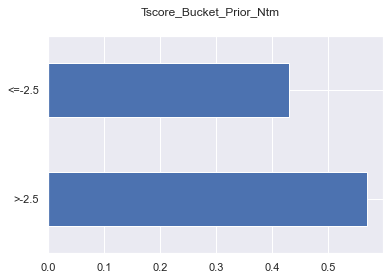

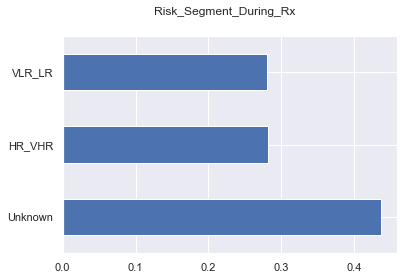

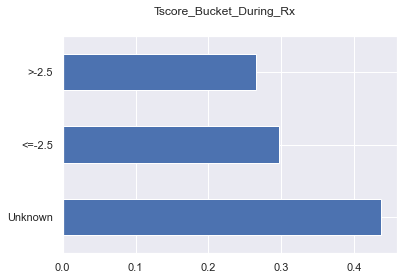

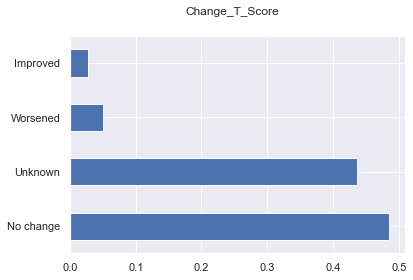

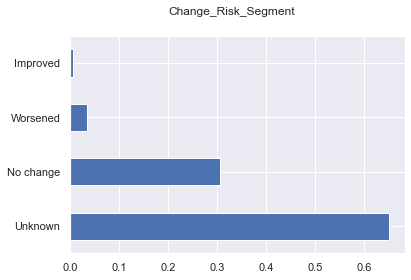

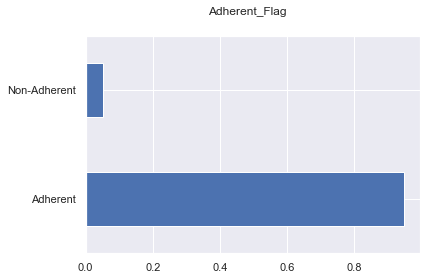

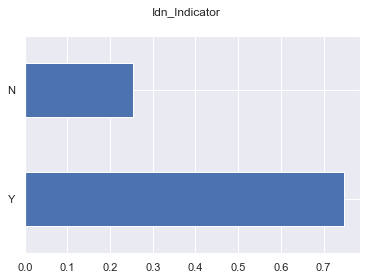

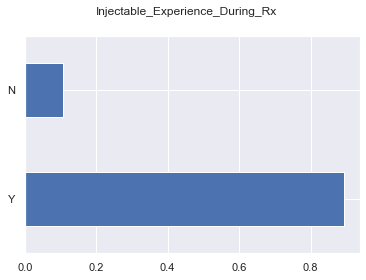

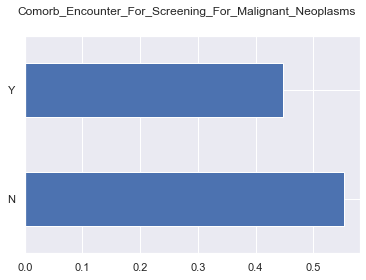

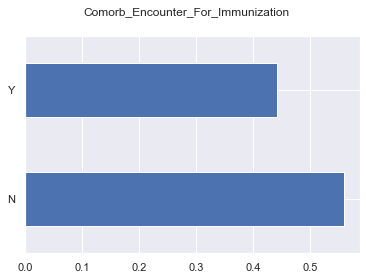

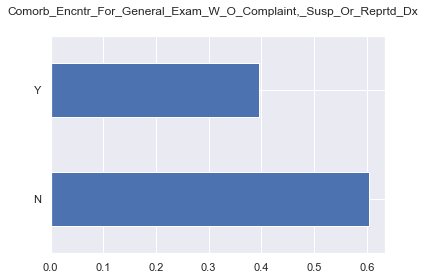

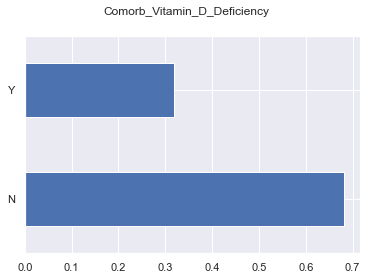

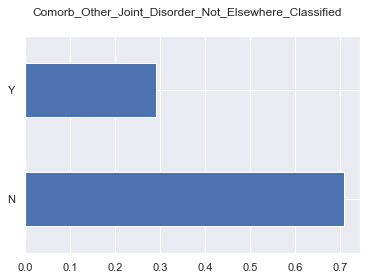

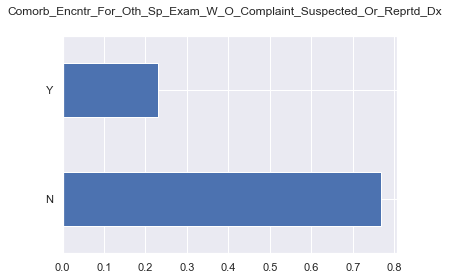

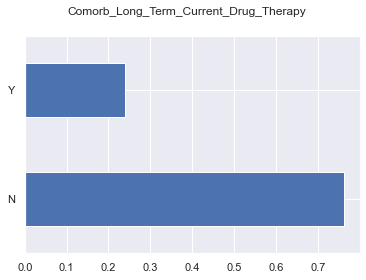

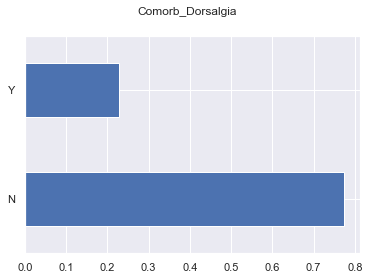

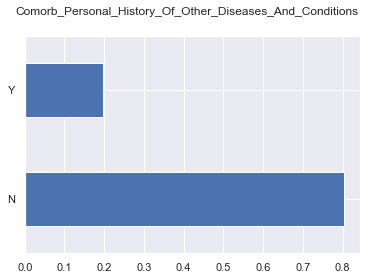

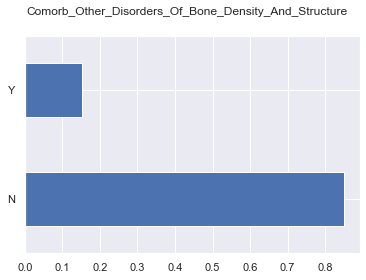

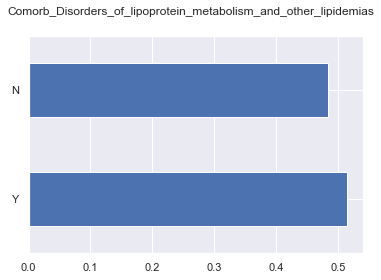

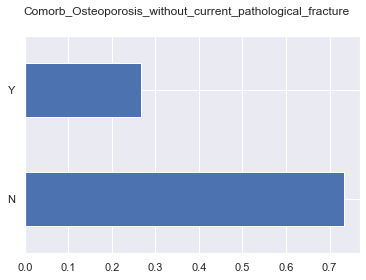

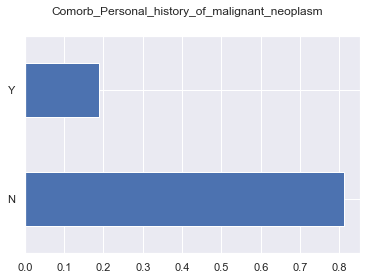

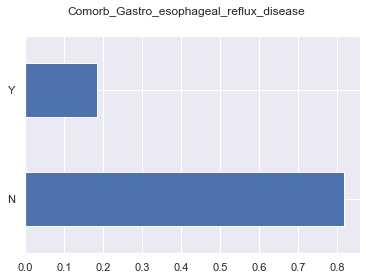

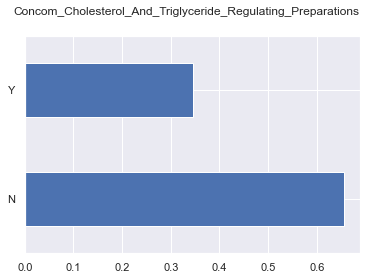

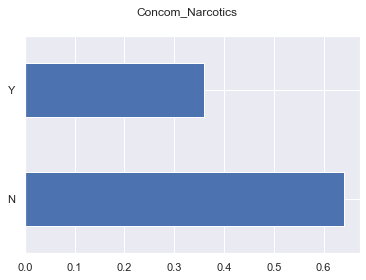

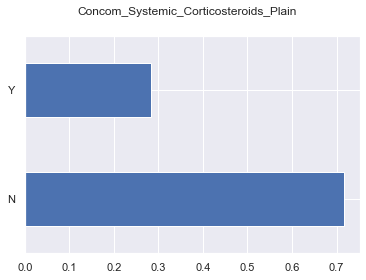

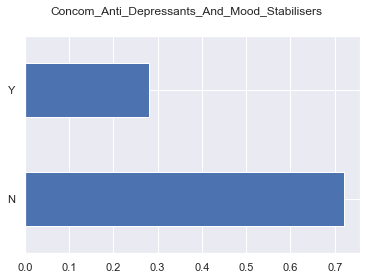

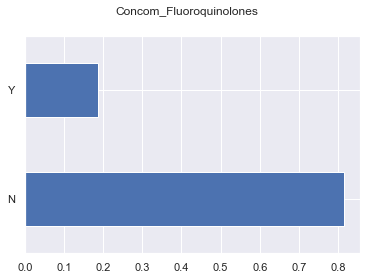

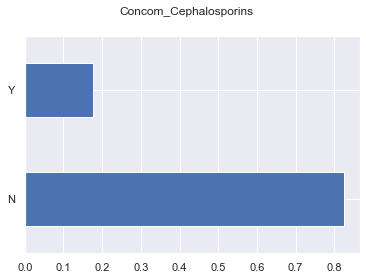

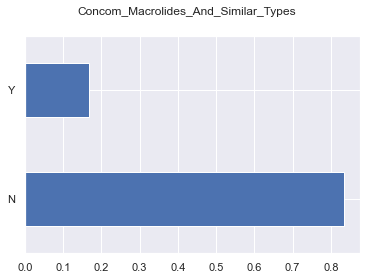

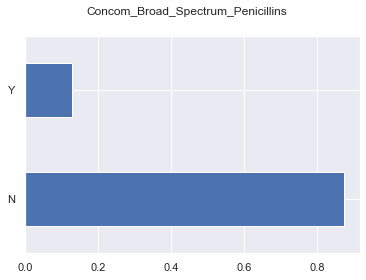

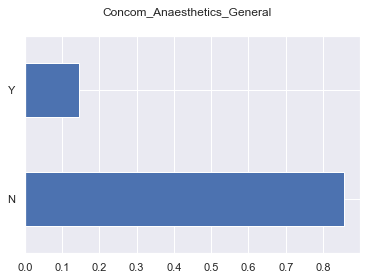

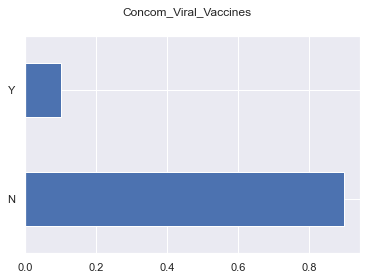

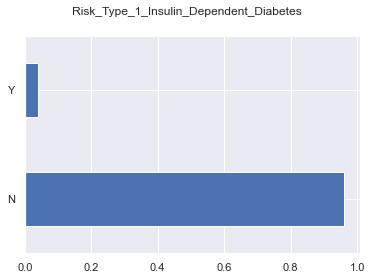

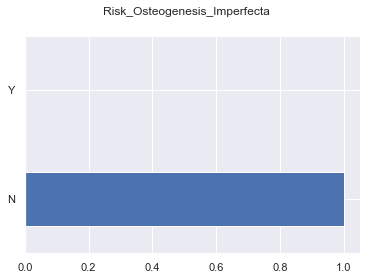

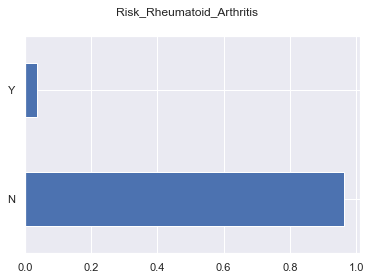

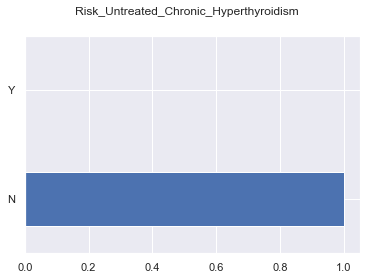

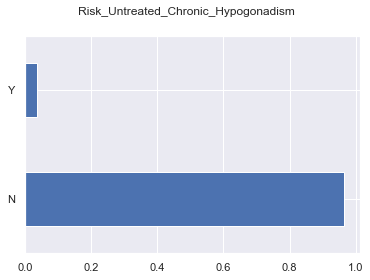

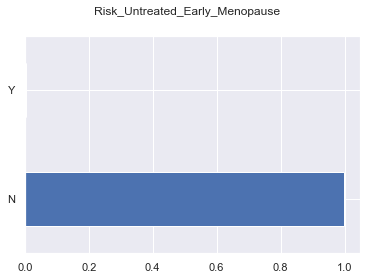

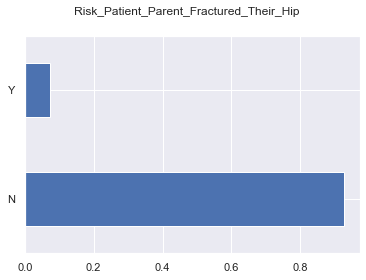

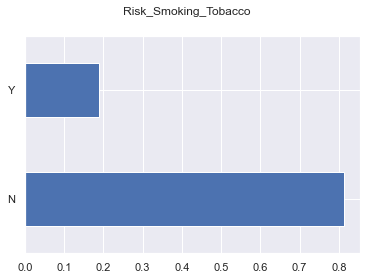

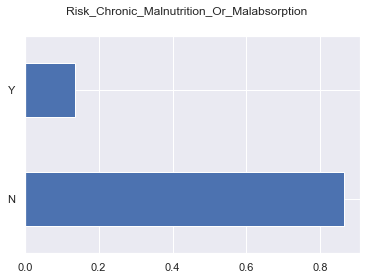

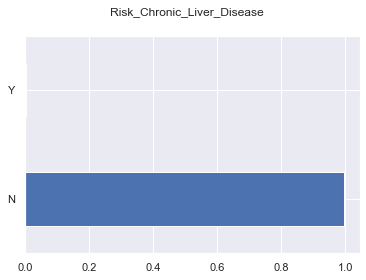

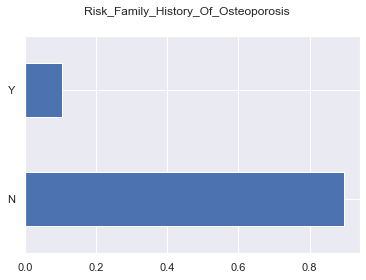

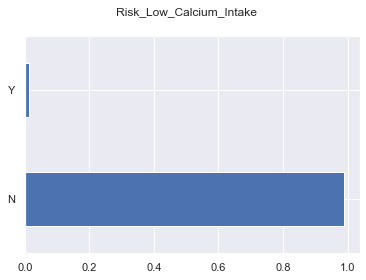

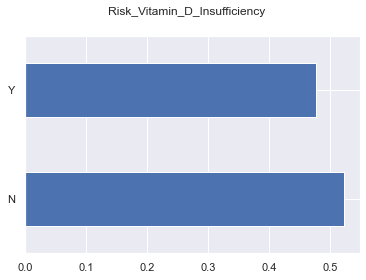

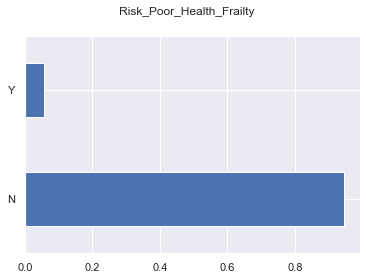

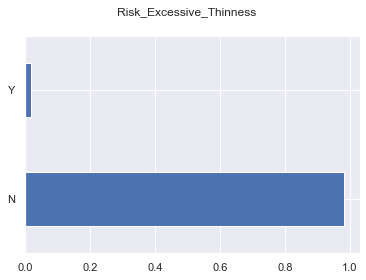

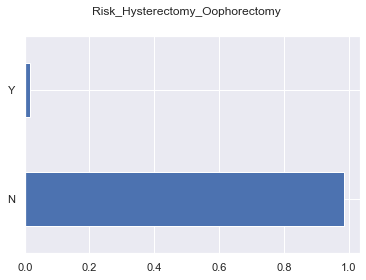

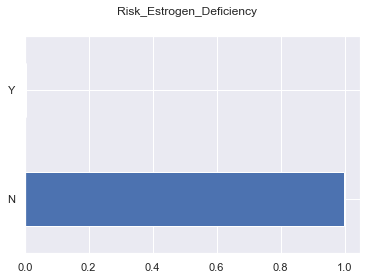

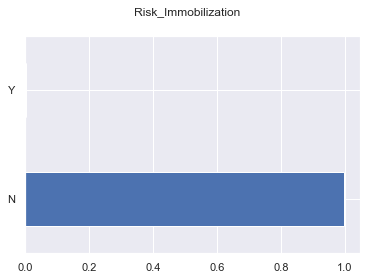

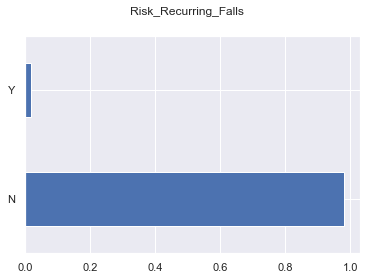

In [22]:
for x in df1.columns[df1.dtypes==object]:
    fig=plt.figure()
    df1[x].value_counts(normalize=True).plot(kind='barh')
    fig.suptitle(x)

In [23]:
df['Ntm_Speciality'].value_counts()

GENERAL PRACTITIONER                                              1535
RHEUMATOLOGY                                                       604
ENDOCRINOLOGY                                                      458
Unknown                                                            310
ONCOLOGY                                                           225
OBSTETRICS AND GYNECOLOGY                                           90
UROLOGY                                                             33
ORTHOPEDIC SURGERY                                                  30
CARDIOLOGY                                                          22
PATHOLOGY                                                           16
HEMATOLOGY & ONCOLOGY                                               14
OTOLARYNGOLOGY                                                      14
PEDIATRICS                                                          13
PHYSICAL MEDICINE AND REHABILITATION                                11
PULMON

In [24]:
conditions=[
    (df['Ntm_Speciality'] == 'GENERAL PRACTITIONER'),
(df['Ntm_Speciality'] == 'RHEUMATOLOGY'),
(df['Ntm_Speciality'] == 'ENDOCRINOLOGY'),
(df['Ntm_Speciality'] == 'ONCOLOGY')
]

In [25]:
choices=['GENERAL PRACTITIONER','RHEUMATOLOGY','ENDOCRINOLOGY','ONCOLOGY']

In [26]:
df['Ntm_Speciality_Cat'] = np.select(conditions, choices, default='other')

In [27]:
df['Ntm_Speciality_Cat'].value_counts()

GENERAL PRACTITIONER    1535
RHEUMATOLOGY             604
other                    602
ENDOCRINOLOGY            458
ONCOLOGY                 225
Name: Ntm_Speciality_Cat, dtype: int64

Categorical data encoding and computing correlation:

In [28]:
from sklearn.preprocessing import LabelEncoder

In [29]:
def number_encode_features(df): 
    result = df.copy()     
    encoders = {}     
    for column in result.columns:         
        if result.dtypes[column] == np.object:             
            encoders[column] = preprocessing.LabelEncoder() 
            result[column] = encoders[column].fit_transform(result[column]
) 
    return result, encoders  
# Calculate the correlation and plot it 
encoded_data, _ = number_encode_features(df)
encoded_data.drop(['Ptid'],axis=1).corr()

,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Speciality,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,...,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks,Ntm_Speciality_Cat
Persistency_Flag,1.000000,0.010343,-0.002052,0.001630,0.084415,-0.001976,-0.003143,0.139387,-0.112617,-0.005758,...,-0.009920,0.079782,-0.045277,-0.040138,-0.016106,-0.012155,-0.049787,-0.021345,0.082431,-0.043667
Gender,0.010343,1.000000,0.009530,0.029018,0.015179,0.076696,0.058281,0.010406,-0.019670,0.024992,...,-0.027311,-0.032103,0.006158,0.001859,-0.031023,-0.013913,0.004093,0.036774,0.002457,0.046190
Race,-0.002052,0.009530,1.000000,-0.028989,-0.012944,-0.001512,-0.029418,-0.003044,-0.009140,0.035363,...,0.007740,-0.032665,-0.000236,0.002434,-0.001218,0.007310,0.008251,-0.007419,0.001930,-0.041562
Ethnicity,0.001630,0.029018,-0.028989,1.000000,-0.051424,0.001757,0.046276,-0.033124,0.055679,0.019482,...,-0.021618,-0.006608,-0.041106,-0.025696,-0.008876,0.000494,0.000558,0.010095,-0.056651,0.048445
Region,0.084415,0.015179,-0.012944,-0.051424,1.000000,0.000325,-0.070516,0.002521,-0.093558,-0.042128,...,-0.060774,0.099222,-0.010350,0.017853,0.025917,-0.034017,-0.022612,-0.005100,0.085319,-0.102258
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Risk_Estrogen_Deficiency,-0.012155,-0.013913,0.007310,0.000494,-0.034017,-0.001795,0.020549,0.025867,-0.021976,-0.007134,...,-0.006327,-0.012976,-0.013837,-0.008020,-0.007186,1.000000,-0.003638,-0.008142,0.078159,0.042243
Risk_Immobilization,-0.049787,0.004093,0.008251,0.000558,-0.022612,0.032081,0.021763,-0.016451,0.003380,-0.003146,...,-0.007140,-0.024640,0.262889,-0.009052,0.028624,-0.003638,1.000000,0.023381,0.100126,0.029212
Risk_Recurring_Falls,-0.021345,0.036774,-0.007419,0.010095,-0.005100,0.055252,0.017813,0.023502,0.004214,-0.001089,...,0.002901,0.020936,0.046352,0.084778,-0.001471,-0.008142,0.023381,1.000000,0.183651,0.007622
Count_Of_Risks,0.082431,0.002457,0.001930,-0.056651,0.085319,-0.030005,-0.000799,0.114095,-0.017185,0.116121,...,0.149635,0.552934,0.284397,0.183343,0.143374,0.078159,0.100126,0.183651,1.000000,-0.041675


In [30]:
def get_redundant_pairs(encoded_data):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = encoded_data.columns
    for i in range(0, encoded_data.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(encoded_data, n=5):
    au_corr = encoded_data.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(encoded_data)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(encoded_data, 3))

Top Absolute Correlations
Dexa_Freq_During_Rx     Dexa_During_Rx             0.948994
Ntm_Speciality          Ntm_Speciality_Cat         0.868479
Risk_Segment_Prior_Ntm  Tscore_Bucket_Prior_Ntm    0.866841
dtype: float64


# Exploratory Data Analysis:

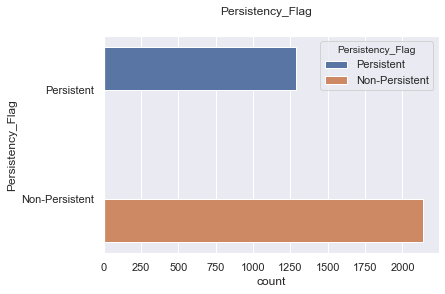

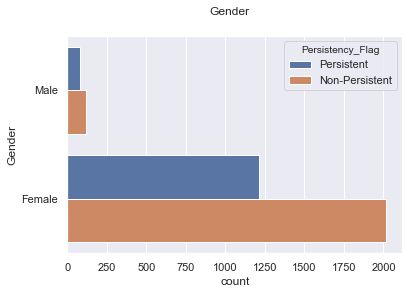

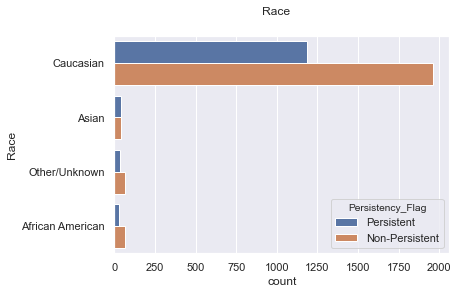

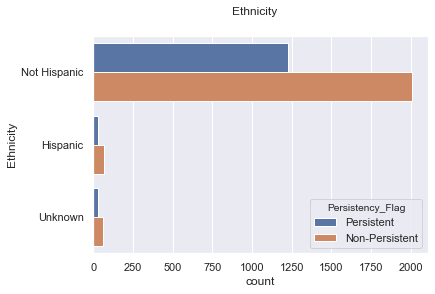

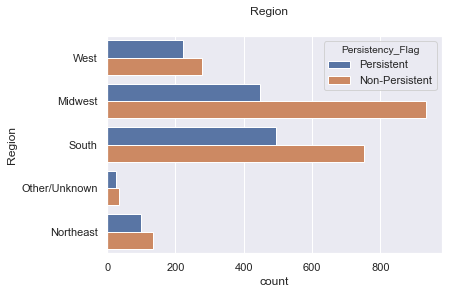

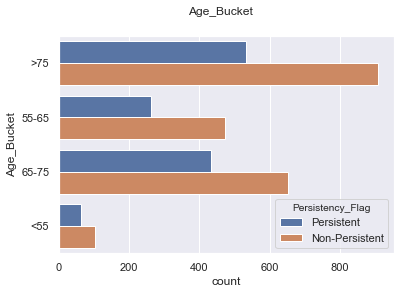

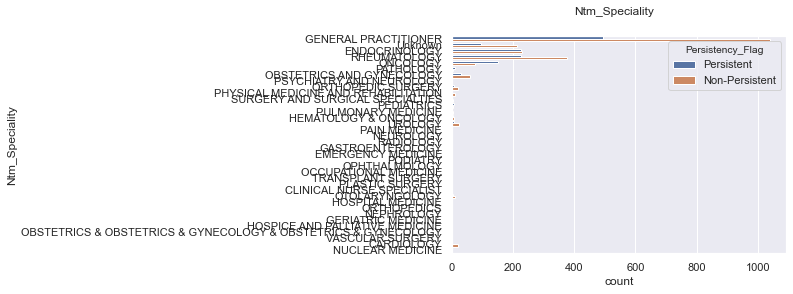

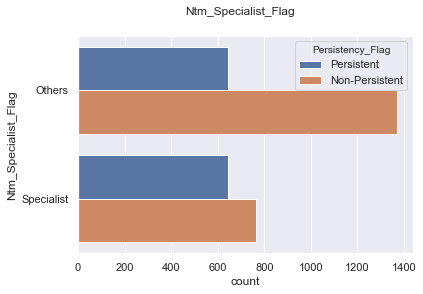

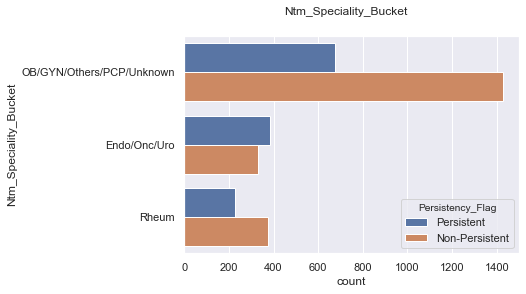

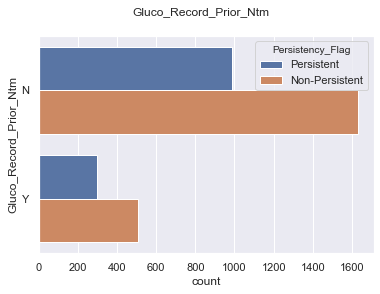

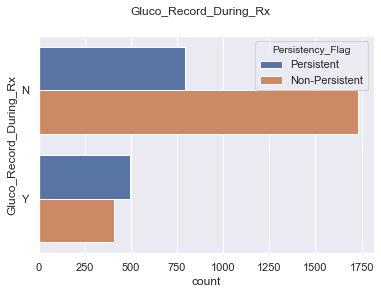

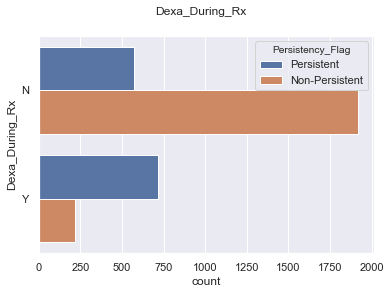

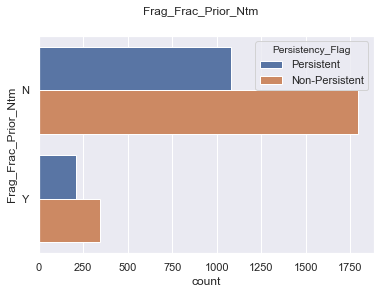

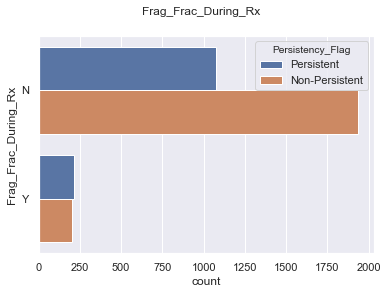

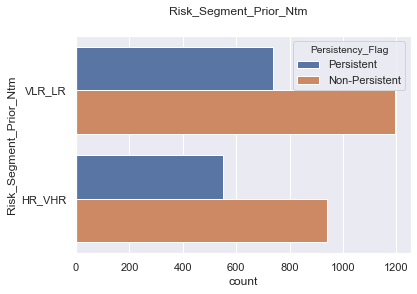

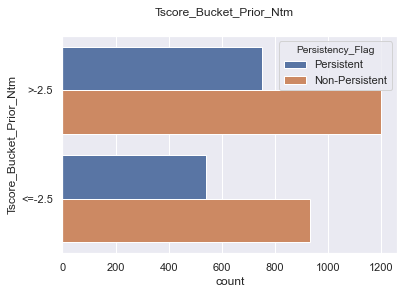

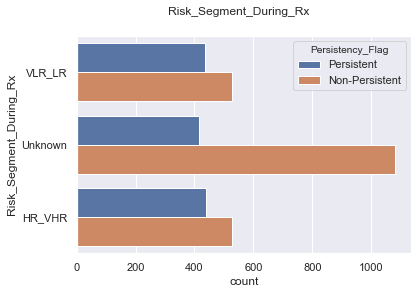

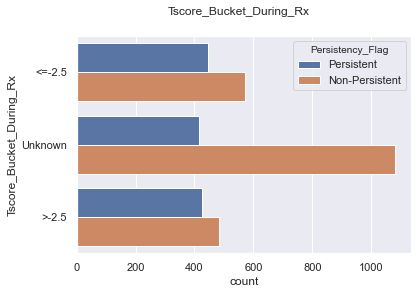

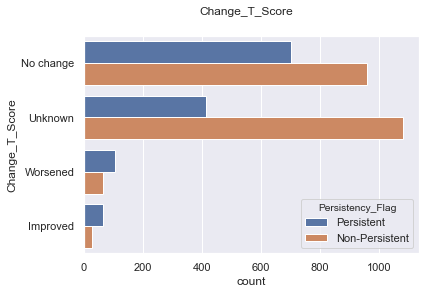

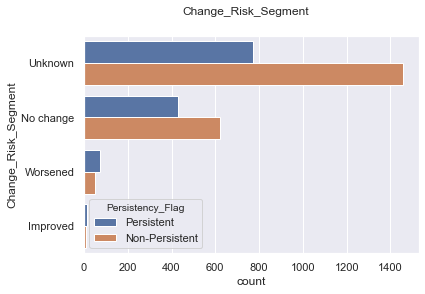

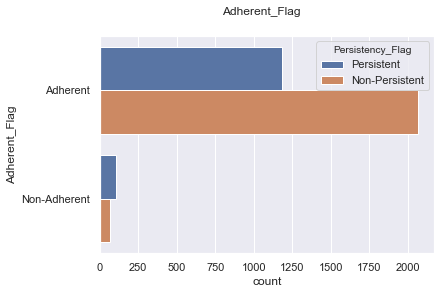

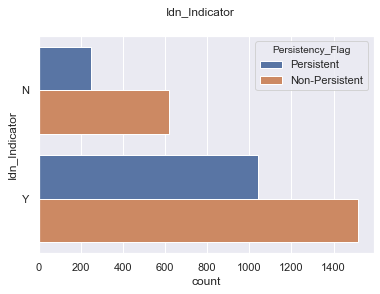

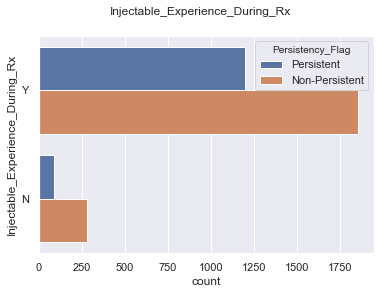

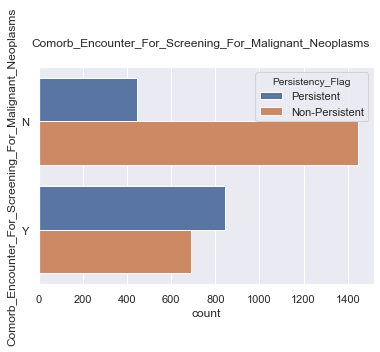

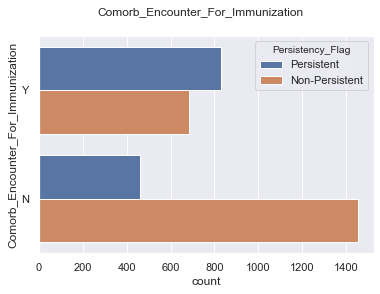

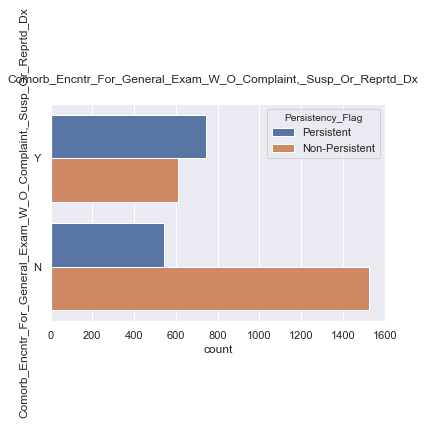

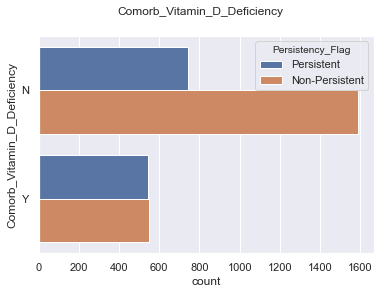

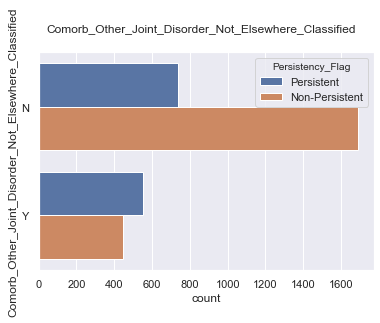

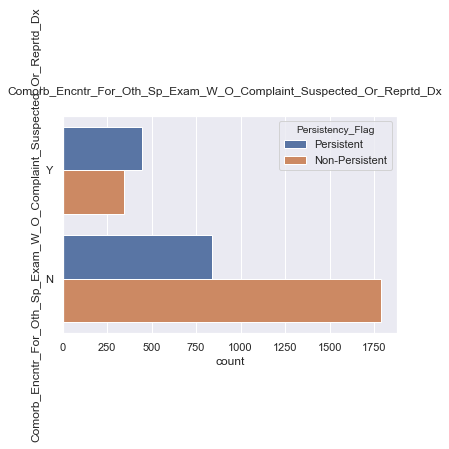

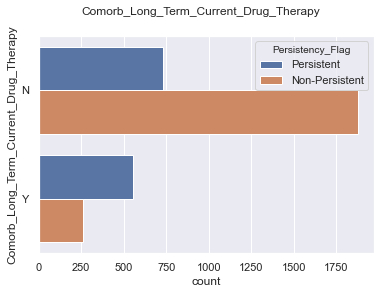

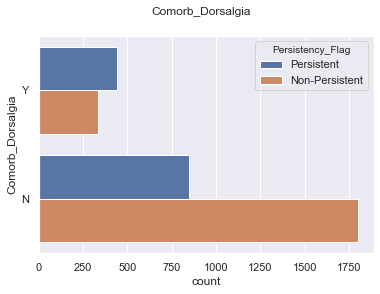

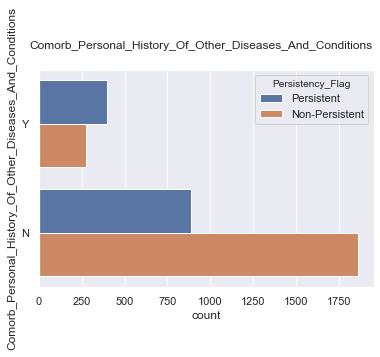

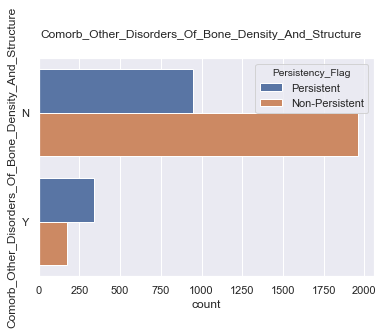

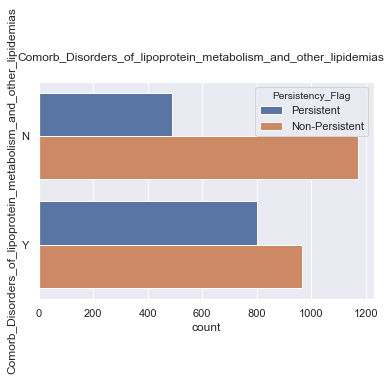

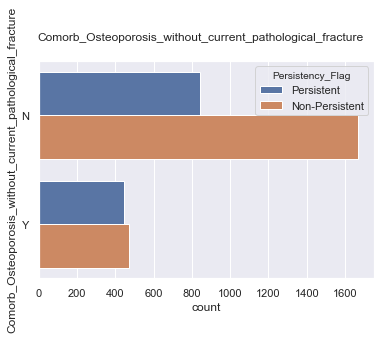

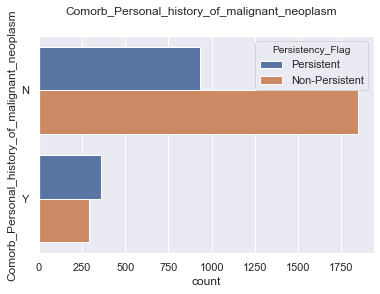

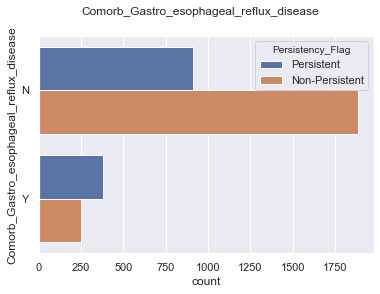

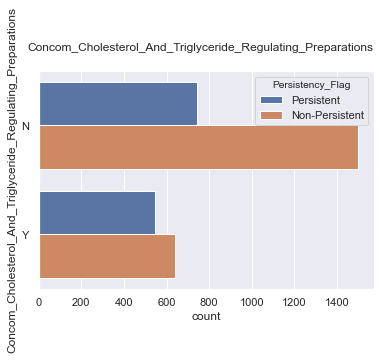

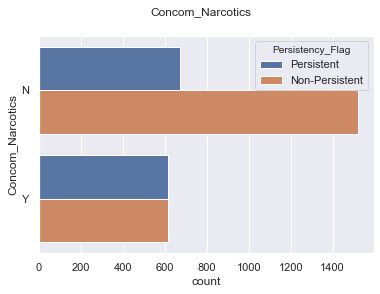

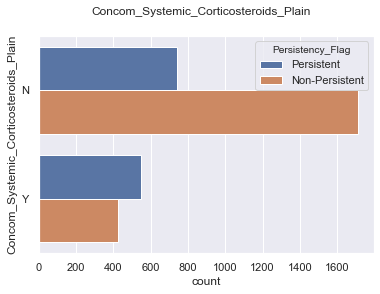

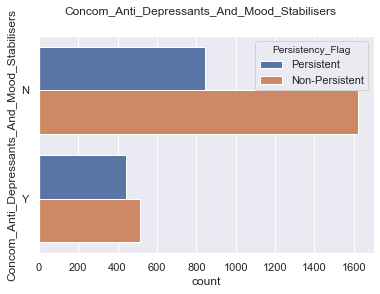

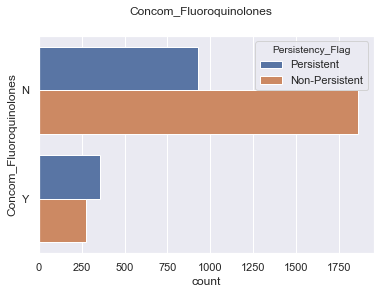

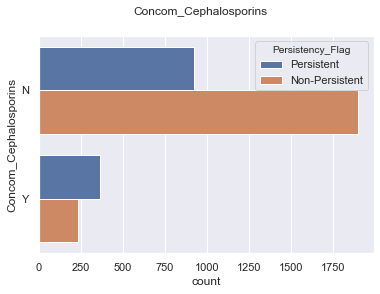

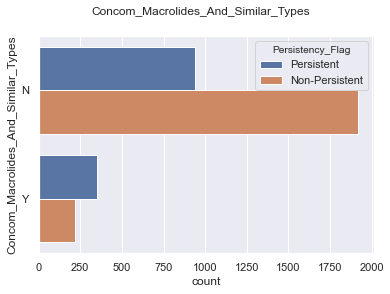

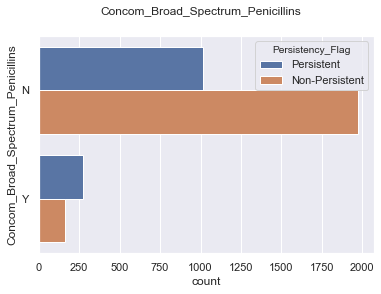

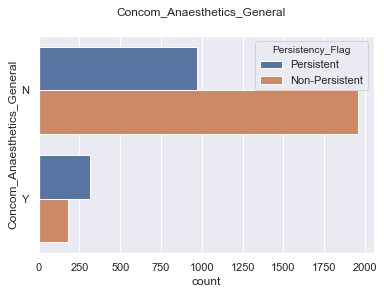

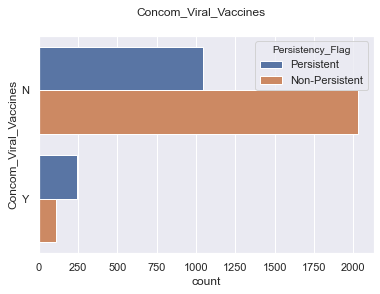

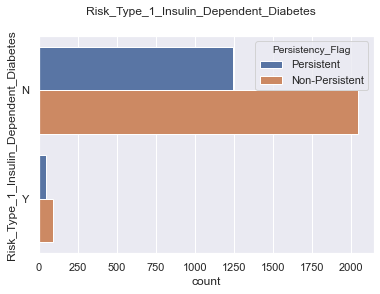

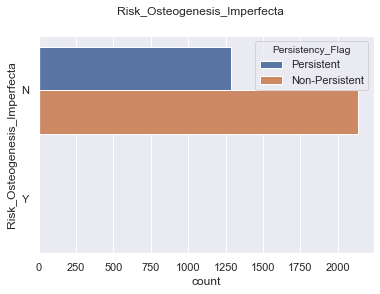

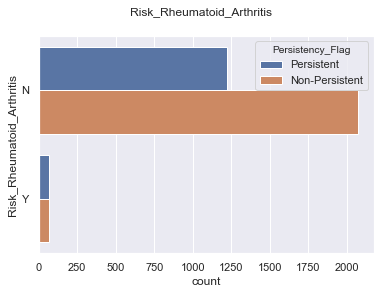

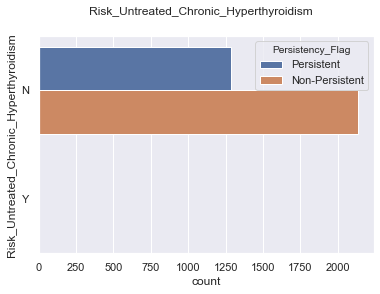

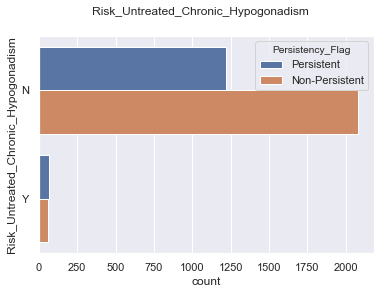

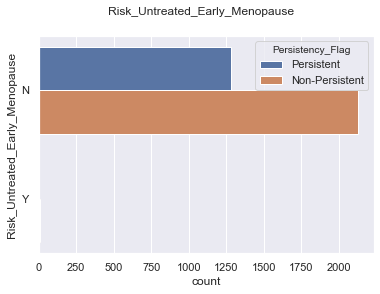

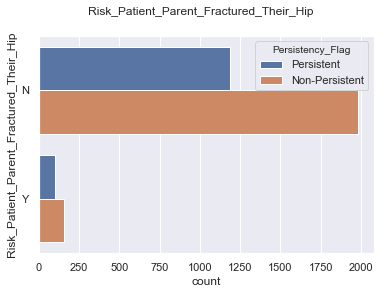

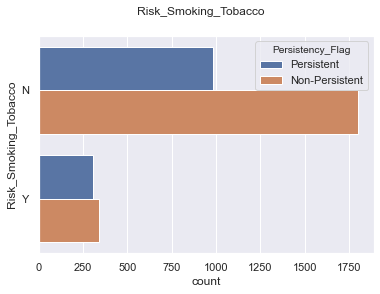

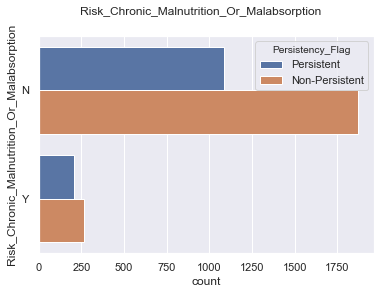

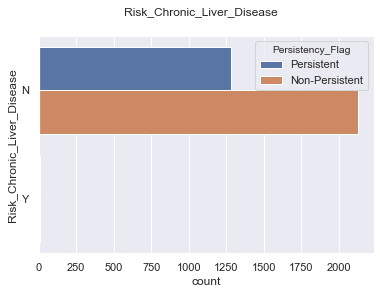

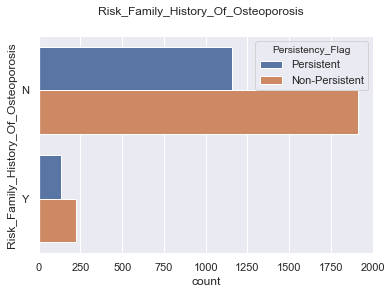

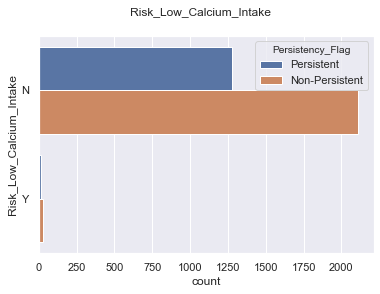

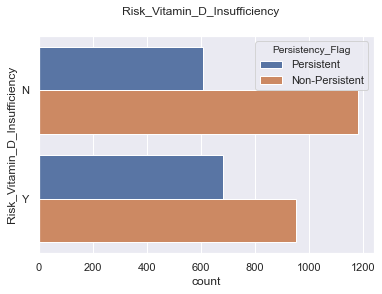

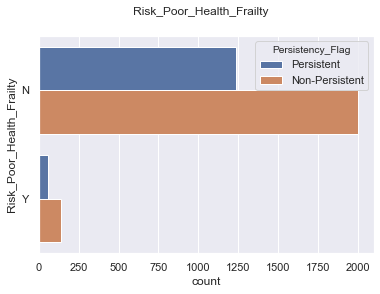

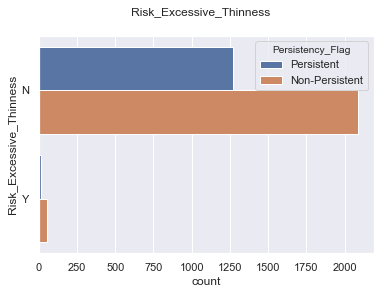

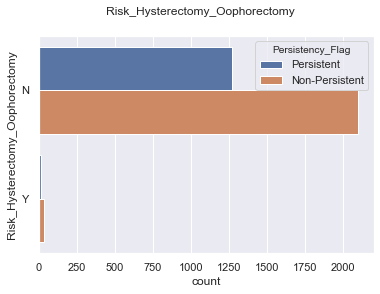

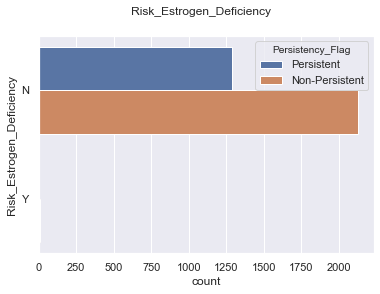

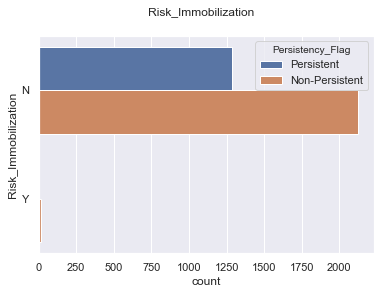

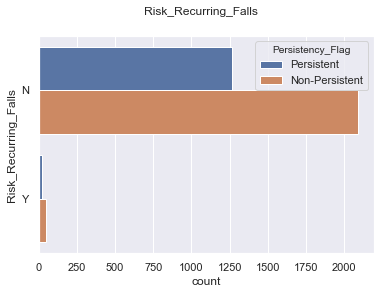

In [31]:
for x in df1.columns[df1.dtypes==object]:
    fig=plt.figure()
    sns.countplot(y=df1[x],hue=df1['Persistency_Flag'],data=df1)
    fig.suptitle(x)

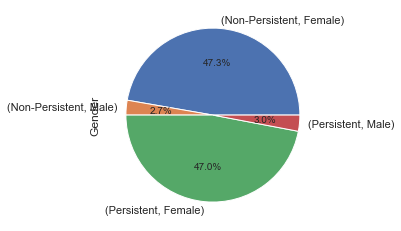

In [32]:
df.groupby('Persistency_Flag')['Gender'].value_counts(normalize=True).plot.pie(autopct="%.1f%%");

In [33]:
data=df.groupby('Persistency_Flag')['Gender'].value_counts(normalize=True)

([<matplotlib.patches.Wedge at 0x10ce0e10>,
 [Text(0.0988710495689853, 1.1457419061713363, "('Non-Persistent', 'Female')"),
  Text(-1.1457419073284583, 0.0988710361599731, "('Non-Persistent', 'Male')"),
  Text(-0.10775019984201756, -1.144941000416181, "('Persistent', 'Female')"),
  Text(1.144940996633067, -0.107750240040935, "('Persistent', 'Male')")],
 [Text(0.047286154141688616, 0.547963520342813, '47.3%'),
  Text(-0.5479635208962191, 0.04728614772868278, '2.7%'),
  Text(-0.05153270427226926, -0.5475804784599126, '47.0%'),
  Text(0.5475804766505973, -0.05153272349783848, '3.0%')])

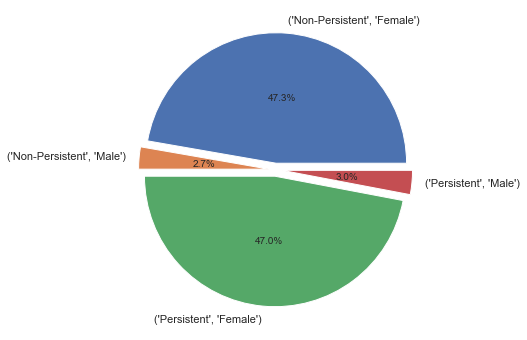

In [34]:
pie, ax = plt.subplots(figsize=[10,6])
labels = data.keys()
plt.pie(x=data, autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.5)

<AxesSubplot:ylabel='Persistency_Flag,Ethnicity'>

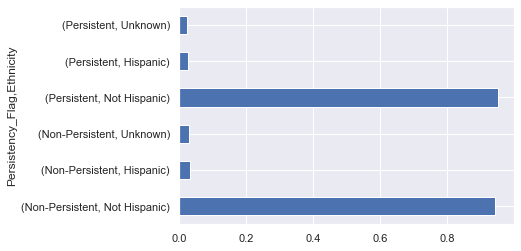

In [35]:
df.groupby('Persistency_Flag')['Ethnicity'].value_counts(normalize=True).plot.barh()

<AxesSubplot:ylabel='Persistency_Flag,Region'>

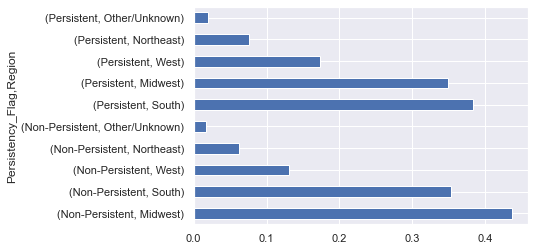

In [36]:
df.groupby('Persistency_Flag')['Region'].value_counts(normalize=True).plot.barh()

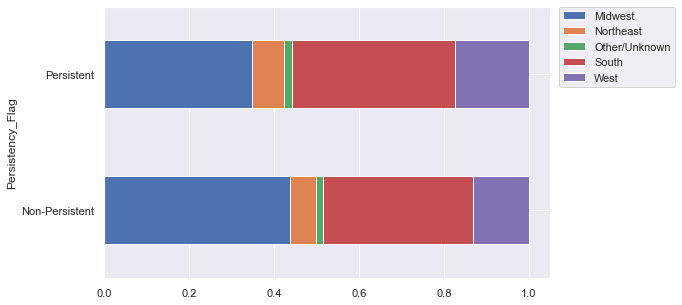

In [37]:
fig_dim=(8,5)
fig, ax= plt.subplots(figsize=fig_dim)
df.groupby('Persistency_Flag')['Region'].value_counts(normalize=True).unstack('Region').plot.barh(stacked=True,ax=ax);
plt.legend(bbox_to_anchor=(1.02,1),loc='upper left', borderaxespad=0)

In [38]:
p1=df.groupby(['Persistency_Flag','Gender'])['Count_Of_Risks'].sum().reset_index()

In [39]:
p1

,Persistency_Flag,Gender,Count_Of_Risks
0,Non-Persistent,Female,2351.0
1,Non-Persistent,Male,141.0
2,Persistent,Female,1641.0
3,Persistent,Male,101.0


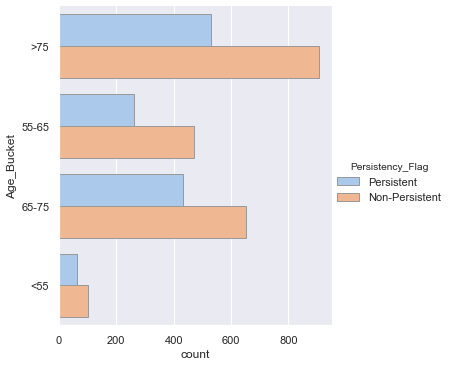

In [40]:
sns.catplot(y="Age_Bucket",hue="Persistency_Flag", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

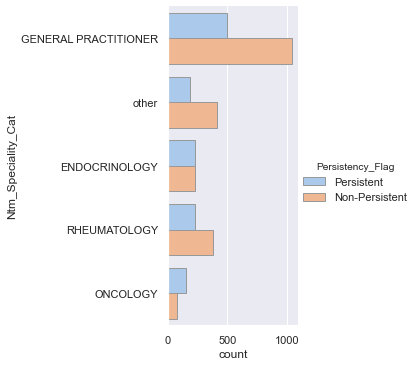

In [41]:
sns.catplot(y="Ntm_Speciality_Cat",hue="Persistency_Flag", kind="count",
            palette="pastel", edgecolor=".6",
            data=df)

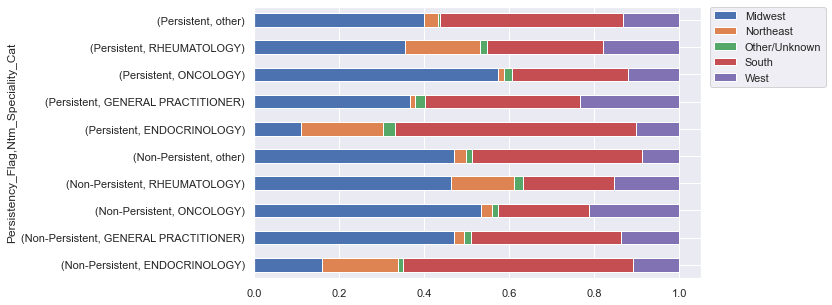

In [42]:
fig_dim=(8,5)
fig, ax= plt.subplots(figsize=fig_dim)
df.groupby(['Persistency_Flag','Ntm_Speciality_Cat'])['Region'].value_counts(normalize=True).unstack('Region').plot.barh(stacked=True,ax=ax);
plt.legend(bbox_to_anchor=(1.02,1),loc='upper left', borderaxespad=0)

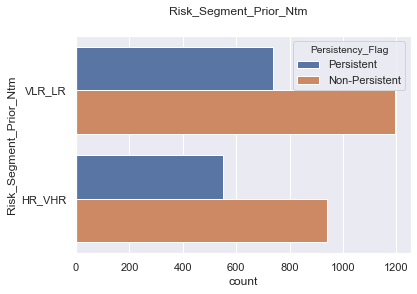

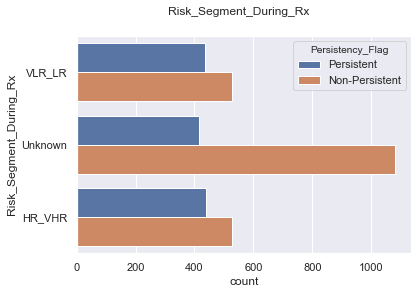

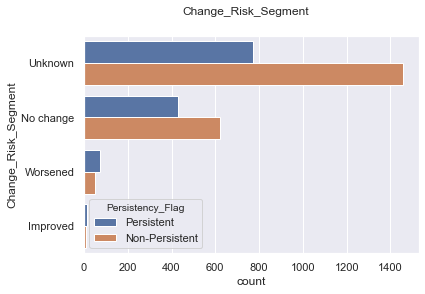

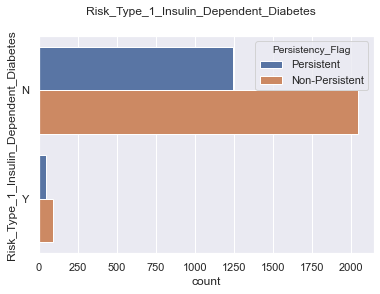

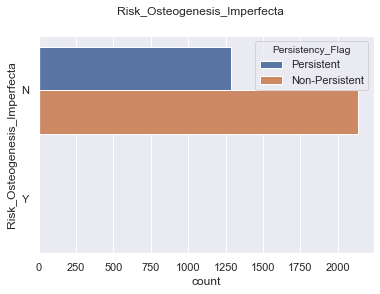

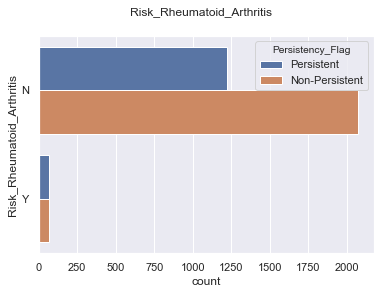

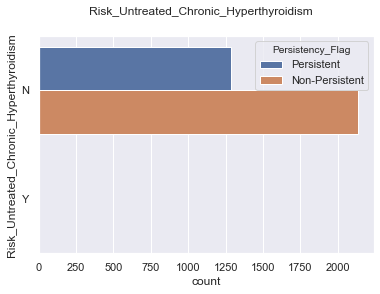

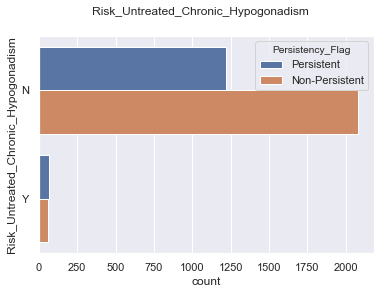

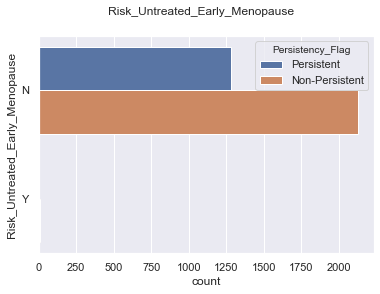

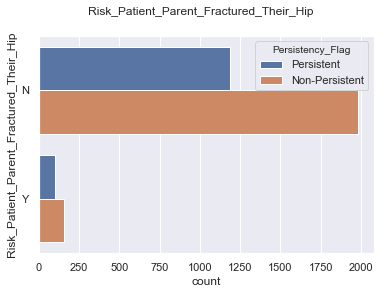

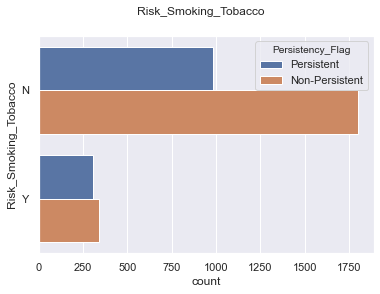

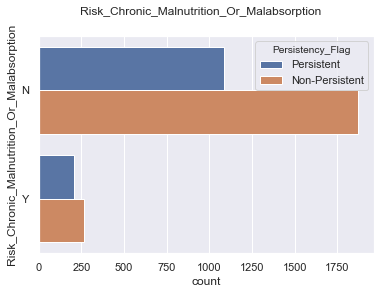

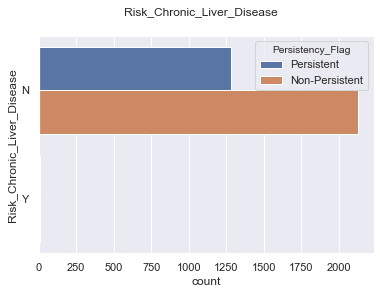

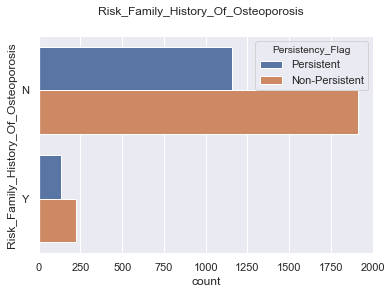

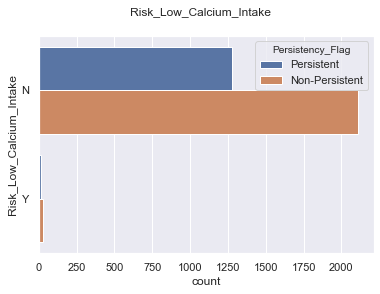

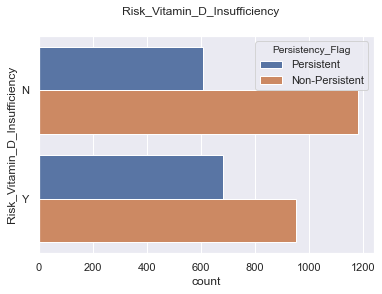

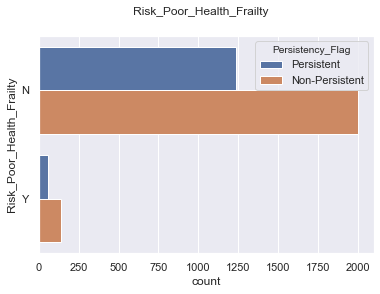

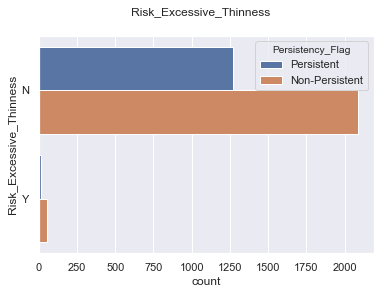

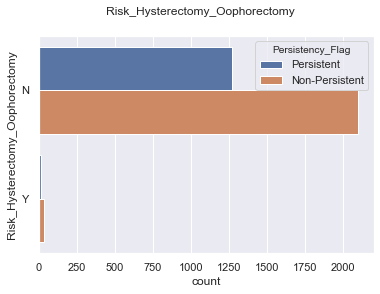

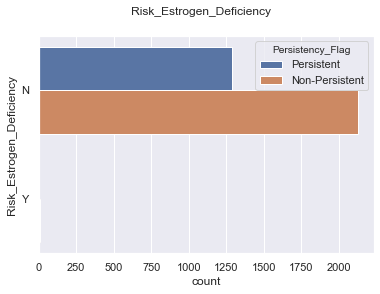

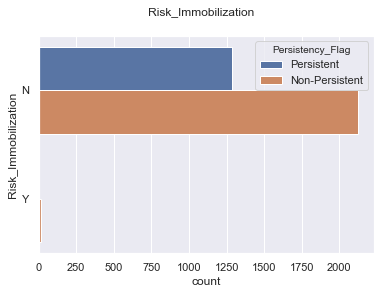

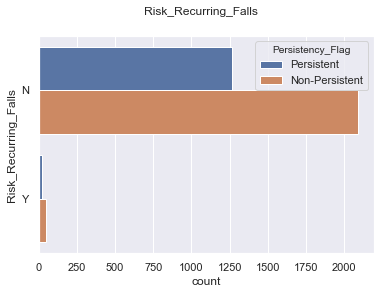

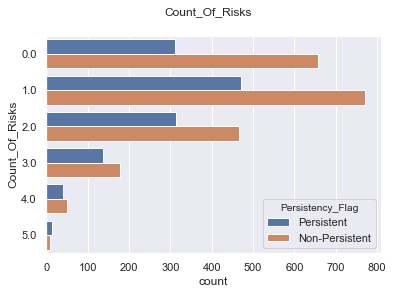

In [43]:
risk_cols = [col for col in df.columns if 'Risk' in col]
for x in risk_cols:
    fig=plt.figure()
    sns.countplot(y=df[x],hue=df['Persistency_Flag'],data=df)
    fig.suptitle(x)

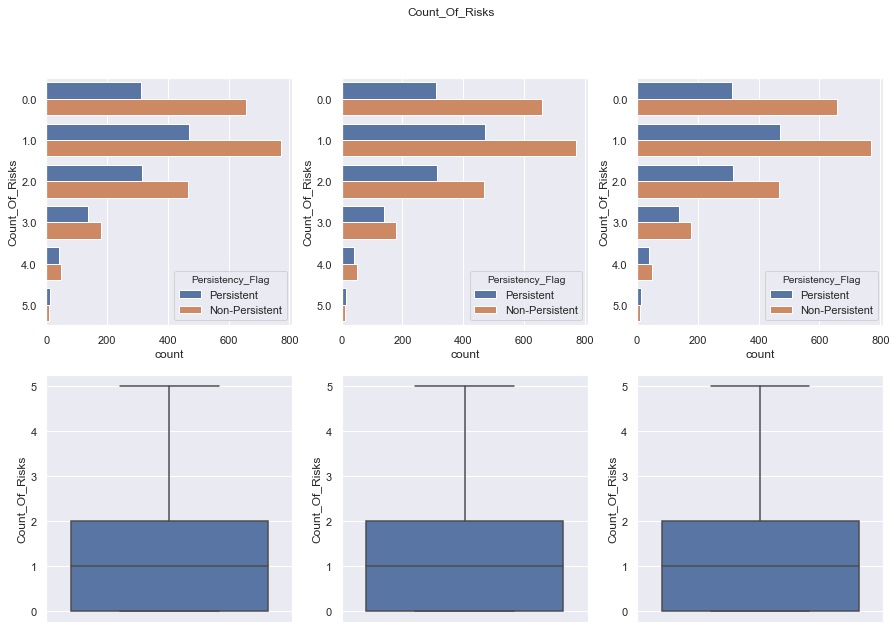

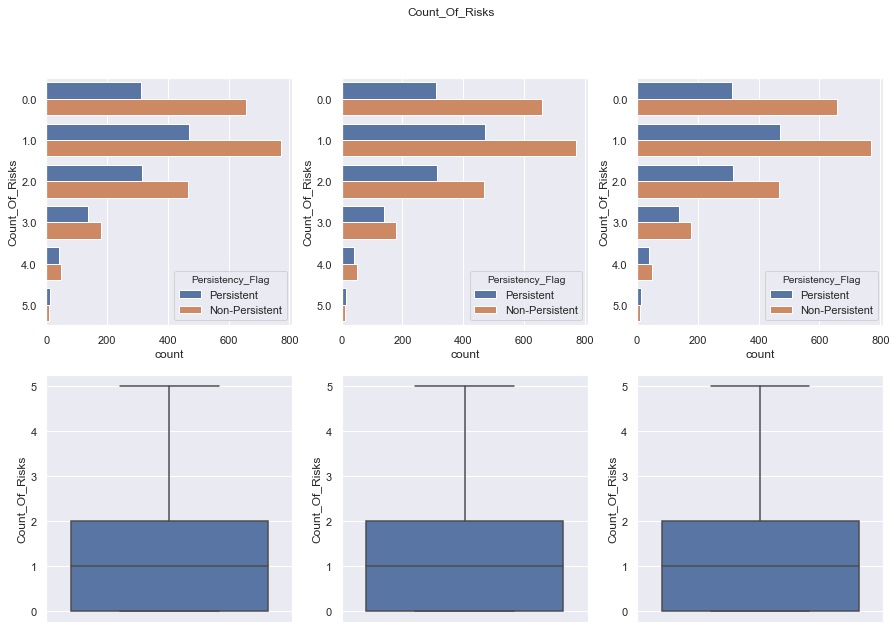

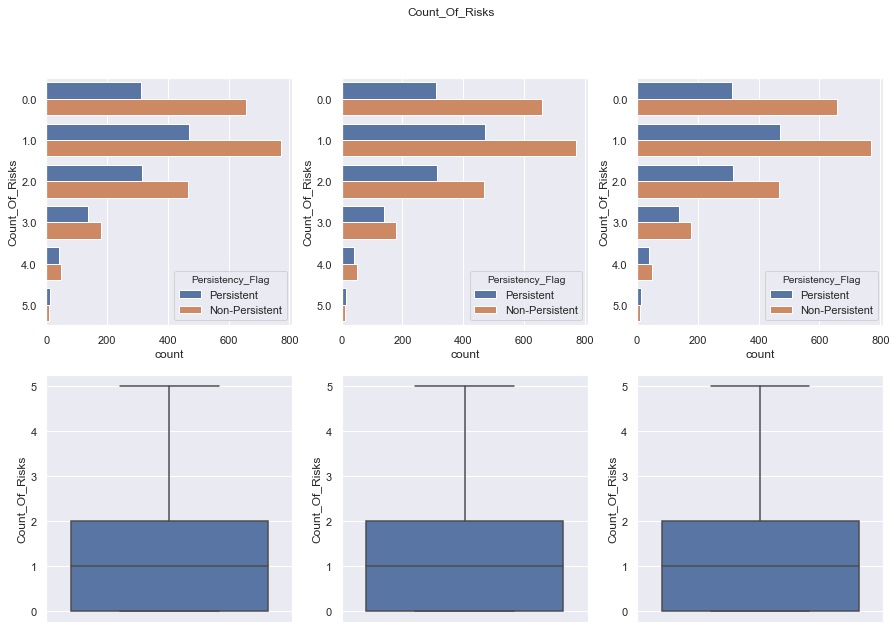

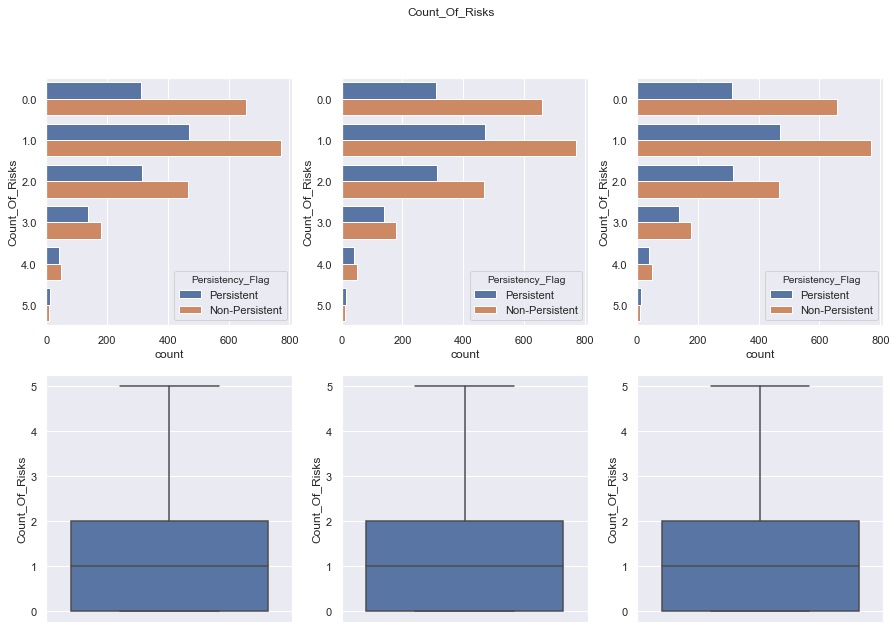

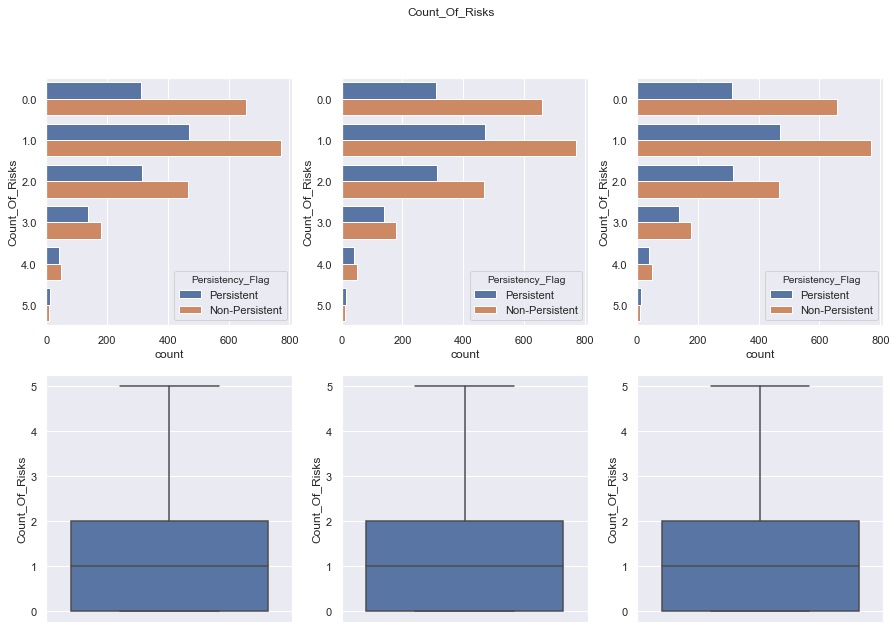

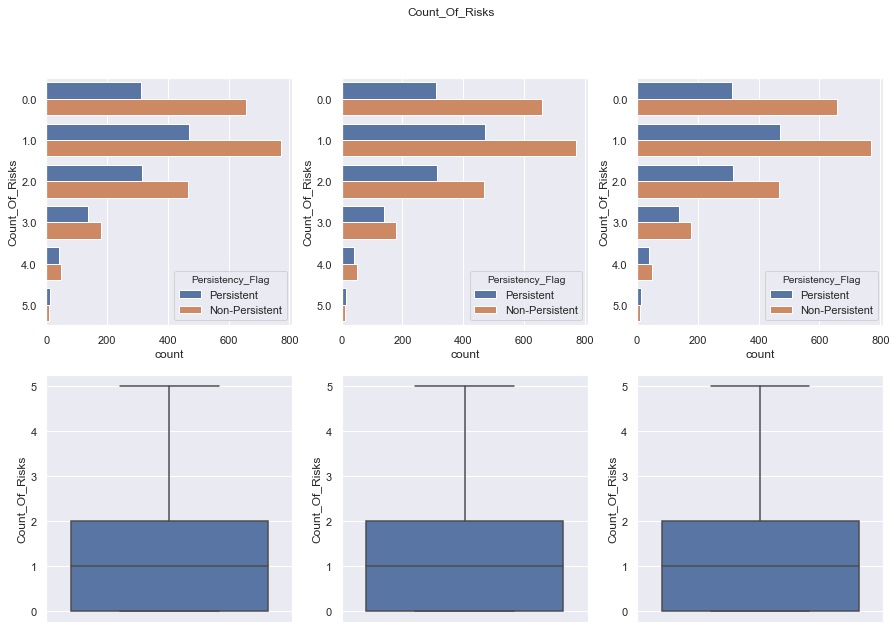

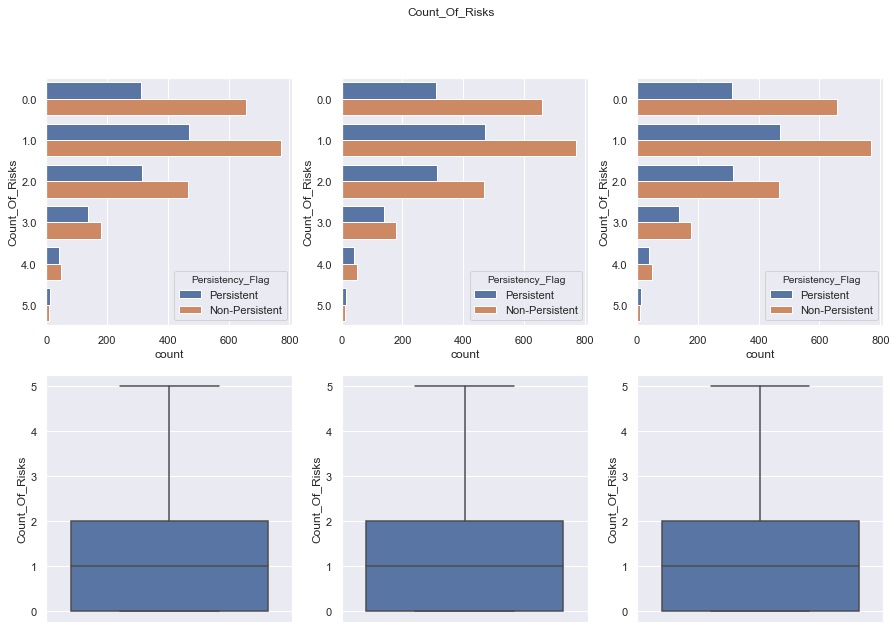

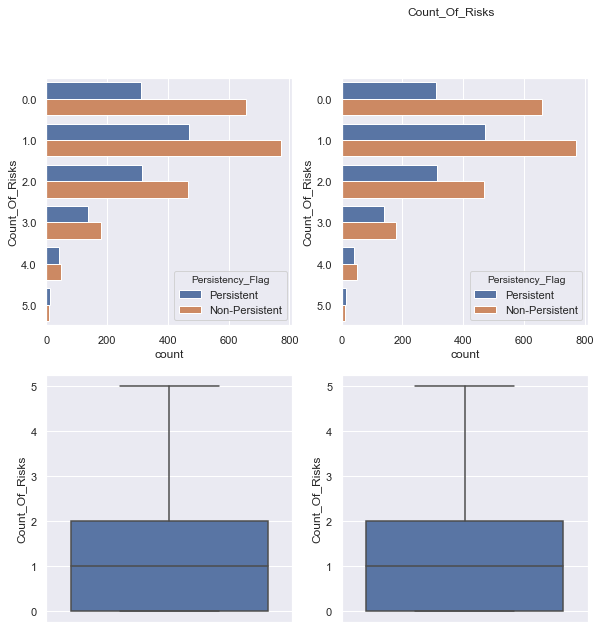

In [44]:
ix = 1
fig = plt.figure(figsize = (15,10))
for c in list(risk_cols):
    if ix <= 3:
        ax1 = fig.add_subplot(2,3,ix)
        sns.countplot(data = df, y=df[x],hue="Persistency_Flag", ax = ax1)
        ax2 = fig.add_subplot(2,3,ix+3)
        sns.boxplot(data=df, y=df[x], ax=ax2)
            #sns.violinplot(data=ds_cat, x=c, y='SalePrice', ax=ax2)
            #sns.swarmplot(data = ds_cat, x=c, y ='SalePrice', color = 'k', alpha = 0.4, ax=ax2)
        fig.suptitle(x)   
    ix = ix +1
    if ix == 4: 
        fig = plt.figure(figsize = (15,10))
        ix =1

# Feature Selection and Modeling:

In [45]:
df2=encoded_data.drop(['Ptid','Dexa_Freq_During_Rx','Ntm_Speciality','Risk_Segment_Prior_Ntm'],axis=1)

In [46]:
df2.head()

,Persistency_Flag,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,...,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks,Ntm_Speciality_Cat
0,1,1,2,1,4,3,0,1,0,0,...,0,0,0,0,0,0,0,0,0.0,1
1,0,1,1,1,4,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0.0,1
2,0,0,3,0,0,1,0,1,0,0,...,1,0,0,0,0,0,0,0,2.0,1
3,0,0,2,1,0,3,0,1,0,1,...,0,0,0,0,0,0,0,0,1.0,1
4,0,0,2,1,0,3,0,1,1,1,...,0,0,0,0,0,0,0,0,1.0,1


In [47]:
X = df2.drop(['Persistency_Flag'], axis=1)
Y = df2['Persistency_Flag']

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
xtrain, xtest, ytrain, ytest = train_test_split(
    X, Y, test_size=0.3, random_state=25, shuffle=True)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(2396, 65) (2396,)
(1028, 65) (1028,)


In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
lr_model = LogisticRegression(random_state=25)

In [52]:
lr_model.fit(xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=25, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
pred = lr_model.predict(xtest)

In [54]:
pred[0:9]

array([0, 0, 1, 1, 0, 0, 1, 1, 0])

In [55]:
pred_prb = lr_model.predict_proba(xtest)

In [56]:
pred_prb[0:9, 0:9]

array([[0.66683199, 0.33316801],
       [0.91720807, 0.08279193],
       [0.2707736 , 0.7292264 ],
       [0.14434199, 0.85565801],
       [0.89952861, 0.10047139],
       [0.60013178, 0.39986822],
       [0.37384119, 0.62615881],
       [0.19115354, 0.80884646],
       [0.93518268, 0.06481732]])

In [57]:
lr_pred_prb = lr_model.predict_proba(xtest)[:, 1]

In [58]:
xtest.head()

,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_During_Rx,...,Risk_Low_Calcium_Intake,Risk_Vitamin_D_Insufficiency,Risk_Poor_Health_Frailty,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks,Ntm_Speciality_Cat
1213,1,2,1,3,3,0,1,1,1,0,...,0,0,0,0,0,0,0,0,2.0,4
3283,0,2,1,3,3,0,1,0,0,0,...,0,0,0,0,0,0,0,1,2.0,4
1087,0,2,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0.0,2
1235,0,2,1,3,2,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0.0,0
2849,0,2,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0.0,1


In [59]:
xt = xtest.copy()
xt['pred'] = pred
xt['pred_probability'] = lr_pred_prb
xt['actual'] = ytest
xt.head()

,Gender,Race,Ethnicity,Region,Age_Bucket,Ntm_Specialist_Flag,Ntm_Speciality_Bucket,Gluco_Record_Prior_Ntm,Gluco_Record_During_Rx,Dexa_During_Rx,...,Risk_Excessive_Thinness,Risk_Hysterectomy_Oophorectomy,Risk_Estrogen_Deficiency,Risk_Immobilization,Risk_Recurring_Falls,Count_Of_Risks,Ntm_Speciality_Cat,pred,pred_probability,actual
1213,1,2,1,3,3,0,1,1,1,0,...,0,0,0,0,0,2.0,4,0,0.333168,1
3283,0,2,1,3,3,0,1,0,0,0,...,0,0,0,0,1,2.0,4,0,0.082792,0
1087,0,2,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0.0,2,1,0.729226,0
1235,0,2,1,3,2,1,0,0,1,0,...,0,0,0,0,0,0.0,0,1,0.855658,1
2849,0,2,1,0,0,0,1,0,0,0,...,0,0,0,0,0,0.0,1,0,0.100471,0


In [60]:
from sklearn.metrics import confusion_matrix

In [61]:
confusion_matrix(ytest, pred)

array([[564,  67],
       [134, 263]], dtype=int64)

In [62]:
confusion_matrix(ytest, pred).ravel()

array([564,  67, 134, 263], dtype=int64)

In [63]:
tn, fp, fn, tp = confusion_matrix(ytest, pred).ravel()
conf_matrix = pd.DataFrame({"pred_Persistent": [tp, fp], "pred_Non-Persistent": [
                           fn, tn]}, index=["Persistent", "Not Persistent"])
conf_matrix

,pred_Persistent,pred_Non-Persistent
Persistent,263,134
Not Persistent,67,564


In [64]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [65]:
precision_lr = precision_score(ytest, pred)
print("Precision by built-in function: {}".format(precision_lr))
recall_lr = recall_score(ytest, pred)
print("Recall by built-in function: {}".format(recall_lr))
accuracy_lr = accuracy_score(ytest, pred)
print("Accuracy by built-in function: {}".format(accuracy_lr))
f1_lr = f1_score(ytest, pred)
print("F1 Score by built-in function: {}".format(f1_lr))

Precision by built-in function: 0.796969696969697
Recall by built-in function: 0.6624685138539043
Accuracy by built-in function: 0.8044747081712063
F1 Score by built-in function: 0.7235213204951858


In [66]:
tpr = recall_lr
fpr = fp / (fp + tn)

In [67]:
tpr, fpr

(0.6624685138539043, 0.10618066561014262)

In [68]:
fpr = 1 - recall_lr
tpr, fpr

(0.6624685138539043, 0.33753148614609574)

In [69]:
from sklearn.metrics import auc, roc_curve, roc_auc_score

In [70]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8, 6))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0, 1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend(loc='best')

In [71]:
fpr, tpr, threshold = roc_curve(ytest, lr_pred_prb)

In [72]:
auc_lr = roc_auc_score(ytest, lr_pred_prb)
auc_lr

0.8785463080871991

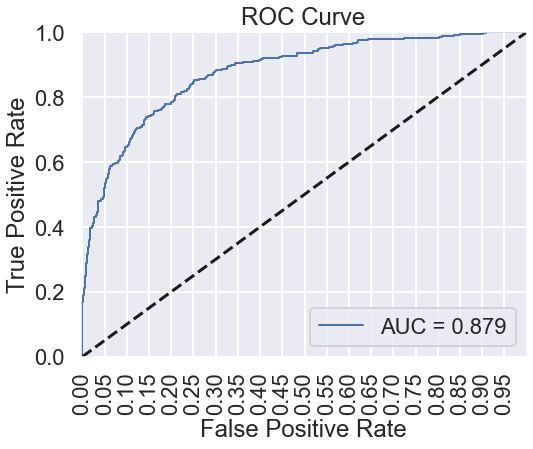

In [73]:
sns.set_context('poster')
plot_roc_curve(fpr, tpr, label='AUC = %0.3f' % auc_lr)

In [74]:
from sklearn.tree import DecisionTreeClassifier

In [75]:
clf_dt = DecisionTreeClassifier(
    max_depth=3, criterion='gini', random_state=100)

In [76]:
clf_dt.fit(xtrain, ytrain)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

In [77]:
dt_pred = clf_dt.predict(xtest)
dt_pred_prb = clf_dt.predict_proba(xtest)[:, 1]

In [78]:
accuracy_dt = accuracy_score(ytest,dt_pred)
print("Accuracy: {}".format(accuracy_dt))
precision_dt=precision_score(ytest,dt_pred)
print("Precision: {}".format(precision_dt))
recall_dt = recall_score(ytest,dt_pred)
print("Recall: {}".format(recall_dt))
dt_f1=f1_score(ytest,dt_pred)
print("F1 Score: {}".format(dt_f1))

Accuracy: 0.7655642023346303
Precision: 0.8095238095238095
Recall: 0.5138539042821159
F1 Score: 0.6286594761171033


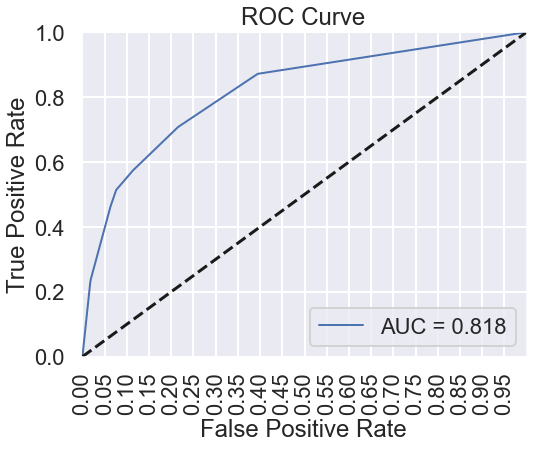

In [79]:
sns.set_context('poster')
auc_dt = roc_auc_score(ytest, dt_pred_prb)
fpr, tpr, threshold = roc_curve(ytest, dt_pred_prb)
plot_roc_curve(fpr, tpr, label='AUC = %0.3f' % auc_dt)

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
clf_rf = RandomForestClassifier(random_state=100)

In [82]:
clf_rf.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=100,
                       verbose=0, warm_start=False)

In [83]:
rf_pred = clf_rf.predict(xtest)
rf_pred_prb = clf_rf.predict_proba(xtest)[:, 1]

In [84]:
precision_rf=precision_score(ytest,rf_pred)
print("Precision: {}".format(precision_rf))
accuracy_rf = accuracy_score(ytest,rf_pred)
print("Accuracy: {}".format(accuracy_rf))
recall_rf = recall_score(ytest,rf_pred)
print("Recall: {}".format(recall_rf))
rf_f1=f1_score(ytest,rf_pred)
print("F1 Score: {}".format(rf_f1))

Precision: 0.7669902912621359
Accuracy: 0.77431906614786
Recall: 0.5969773299748111
F1 Score: 0.6713881019830029


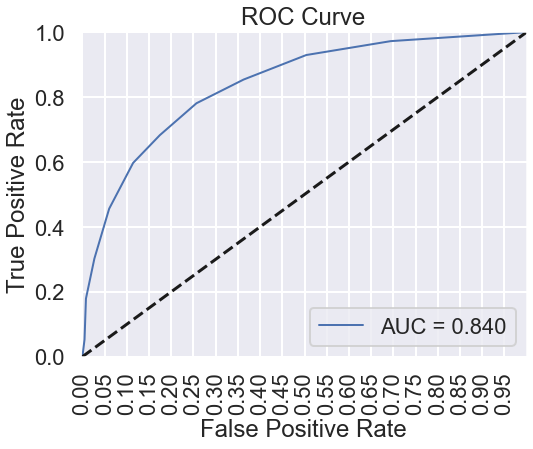

In [85]:
auc_rf = roc_auc_score(ytest, rf_pred_prb)
fpr, tpr, threshold = roc_curve(ytest, rf_pred_prb)
plot_roc_curve(fpr, tpr, label='AUC = %0.3f' % auc_rf)

In [86]:
from sklearn.ensemble import AdaBoostClassifier

In [87]:
clf_adb = AdaBoostClassifier(random_state=100)
clf_adb.fit(xtrain, ytrain)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=100)

In [88]:
pred_clf_adb = clf_adb.predict(xtest)

In [89]:
adb_pred_prb = clf_adb.predict_proba(xtest)[:, 1]

In [90]:
accuracy_adb=accuracy_score(ytest,pred_clf_adb)
print("Accuracy: {}".format(accuracy_adb))
precision_adb=precision_score(ytest, pred_clf_adb)
print("Precision: {}".format(precision_adb))
recall_adb=recall_score(ytest,pred_clf_adb)
print("Recall_score: {}".format(recall_adb))
f1_adb=f1_score(ytest, pred_clf_adb)
print("F1 score: {}".format(f1_adb))

Accuracy: 0.8073929961089494
Precision: 0.7970149253731343
Recall_score: 0.672544080604534
F1 score: 0.7295081967213114


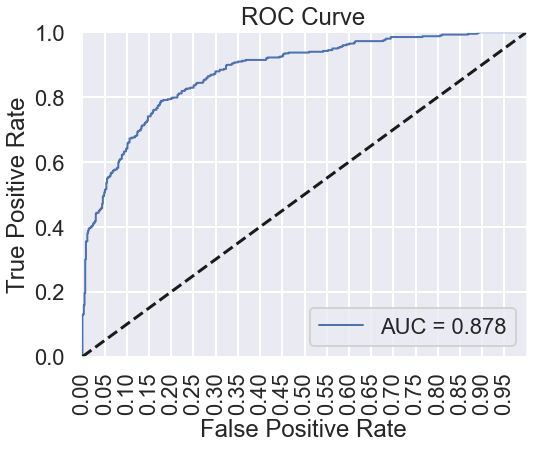

In [91]:
auc_adb = roc_auc_score(ytest, adb_pred_prb)
fpr, tpr, threshold = roc_curve(ytest, adb_pred_prb)
plot_roc_curve(fpr, tpr, label='AUC = %0.3f' % auc_adb)

In [92]:
import xgboost as xgb

In [93]:
clf_xgb = xgb.XGBClassifier(seed=25,nthread=1,random_state=100)

In [94]:
clf_xgb.fit(xtrain, ytrain)

[20:38:36] WARNING: D:\Build\xgboost\xgboost-1.3.3.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=1, nthread=1, num_parallel_tree=1,
              objective='binary:logistic', random_state=100, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=25, subsample=1,
              tree_method='exact', use_label_encoder=True,
              validate_parameters=1, verbosity=None)

In [95]:
xgb_pred = clf_xgb.predict(xtest)
xgb_pred_prb=clf_xgb.predict_proba(xtest)[:,1]

In [96]:
accuracy_xgb = accuracy_score(ytest,xgb_pred)
print("Accuracy: {}".format(accuracy_xgb))
recall_xgb = recall_score(ytest,xgb_pred)
print("Recall: {}".format(recall_xgb))
precision_xgb = precision_score(ytest,xgb_pred)
print("Precision: {}".format(precision_xgb))
f1_xgb=f1_score(ytest, xgb_pred)
print("F1 score: {}".format(f1_xgb))


Accuracy: 0.7889105058365758
Recall: 0.6851385390428212
Precision: 0.7472527472527473
F1 score: 0.7148488830486203


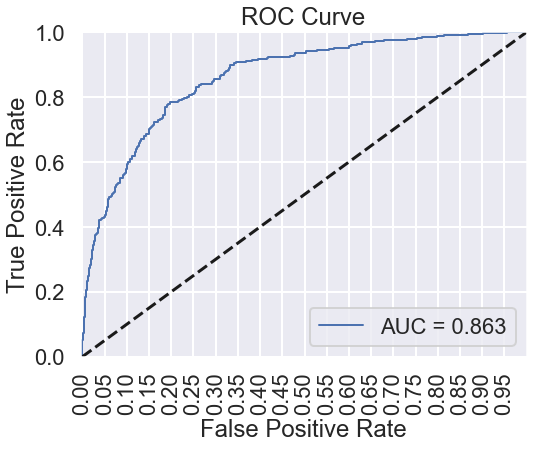

In [97]:
auc_xgb=roc_auc_score(ytest,xgb_pred_prb)
fpr,tpr,threshold=roc_curve(ytest,xgb_pred_prb)
plot_roc_curve(fpr,tpr,label='AUC = %0.3f'% auc_xgb)

In [98]:
comparison_dict={"Algorithm":["Logistic Regression","Decision Tree","Random Forest","XGBoost","Ada Boost"],
                 "Accuracy":[accuracy_lr,accuracy_dt,accuracy_rf,accuracy_xgb,accuracy_adb],
                 "Precision":[precision_lr,precision_dt,precision_rf,precision_xgb,precision_adb],
                 "Recall":[recall_lr,recall_dt,recall_rf,recall_xgb,recall_adb],
                 "AUC":[auc_lr,auc_dt,auc_rf,auc_xgb,auc_adb],
                 "F1 Score":[f1_lr,dt_f1,rf_f1,f1_xgb,f1_adb]
                }

In [100]:
comparison = pd.DataFrame(comparison_dict)
comparison.sort_values(['Recall', 'Accuracy', 'AUC'])

,Algorithm,Accuracy,Precision,Recall,AUC,F1 Score
1,Decision Tree,0.765564,0.809524,0.513854,0.817766,0.628659
2,Random Forest,0.774319,0.766990,0.596977,0.839901,0.671388
0,Logistic Regression,0.804475,0.796970,0.662469,0.878546,0.723521
4,Ada Boost,0.807393,0.797015,0.672544,0.878153,0.729508
3,XGBoost,0.788911,0.747253,0.685139,0.862814,0.714849
